# CI - 0129  | University of Costa Rica


# Red Wine Dataset

# Problem Analysis

In this notebook, we will study the influence of 11 factors on red wine quality with the goal of taking the most relevant features as predictors for the wine's quality. These possible features are:

* Fixed acidity
* Volatile acidity
* Citric acid
* Residual sugar
* Chlorides
* Free sulfur dioxide
* Total sulfur dioxide
* Density
* pH
* Sulphates
* Alcohol

To carry out this research, we'll use this [Dataset](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv) available on [Kaggle](https://kaggle.com). Initially, the data will be imported and cleaned, the purpose of this is that in order to build a successful machine learning model, good and clean data is needed. Secondly, knowledge needs to be gathered about the dataset and we do this by using Exploratory Data Analysis. Finally, we train supervised machine learning models on this data that was cleaned beforehand, comparing the performance of these models and explaining the obtained results.

# Data Analysis (Pre-Processing)

## Dataset Load

Firsly we will import the necesary libraries for data downloading and handling. Then we will load the dataset:

In [ ]:
import pandas as pd

In [ ]:
wine_data = pd.read_csv('https://www.kaggle.com/api/v1/datasets/download/uciml/red-wine-quality-cortez-et-al-2009?dataset_version_number=2&file_name=winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Now that the dataset was imported correctly, let's take a brief look into the types of the individual variables:

In [ ]:
wine_data.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


It is important to note that `quality` in this original dataset has an integer format (`int64`) and sets the ground for multi-class classification. However, since the goal of the present study is to apply binary classification, this normal integer target variable will be converted into a binary target variable following this set of rules:

* **Bad wine:** quality values 3, 4 and 5.
* **Good wine:** quality values 6, 7 and 8.

This variable will be changed later on to comply with this set of rules previously described.

Looking at the column count:

In [ ]:
len(wine_data.columns)

12

It can be seen that the dataset has 12 columns, 11 being the ones described at the start of the notebook, plus the target variable (the wine quality values themselves).

## Target Variable Conversion

Since we're dealing with a binary classification problem, we'll make the target variable binary:

In [ ]:
wine_data['quality'] = (wine_data['quality'] > 5).astype(int)

## Initial Data Exploration

In order to have an idea of how the values are distributed, metrics like the median and the standard deviation of each column will be shown:

In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Analyzing the resulting table, it can be seen that the variables have very different scales between them. This means that the application of either normalization or standardization will be needed in order to improve the model's performance on this data.

So, the values fall into the following ranges:


*   **fixed acidity:** 4.6-15.9
*   **volatile acidity:** 0.12-1.58
*   **citric acid:** 0-1
*   **residual sugar:** 0.9-15.5
*   **chlorides:** 0.012-0.611
*   **free sulfur dioxide:** 1-72
*   **total sulfur dioxide:** 6-289
*   **density:** 0.99-1.003
*   **pH:** 2.74-4.01
*   **sulphates:** 0.33-2
*   **alcohol:** 8.4-14.9
*   **quality:** 0 or 1

Also, thanks to the `count` measurement, the amount of rows present in the dataset can be inferred, so the dataset has 1599 rows.






## Handling Missing Values

Checking how many null values are there in the wine dataset:

In [ ]:
wine_data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Watching the output, it can be seen that there are no missing values in the wine dataset.

## Exploratory Data Analysis

Learning about the data and its distributions can be helpful in order to extract a good performance out of the machine learning models.

### Relationships Between Variables
First, we'll look at how the variables might influence the response variable:

Analyzing `Quality` and `Fixed Acidity`:

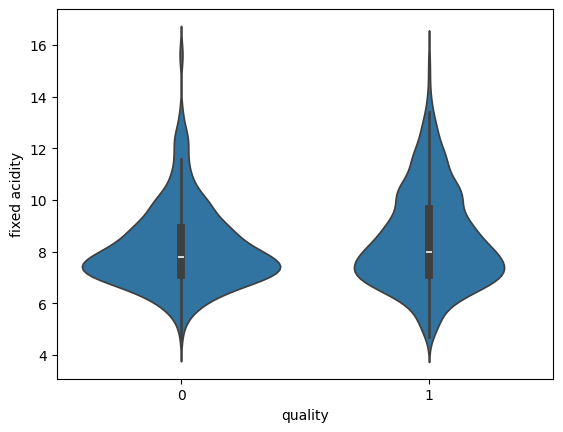

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='quality', y='fixed acidity', data=wine_data)
plt.show()

According to the graph, there isn't a straightforward relationship between the `Quality` and the `Fixed Acidity` of the wine.

Analyzing `Quality` and `Volatile Acidity`:

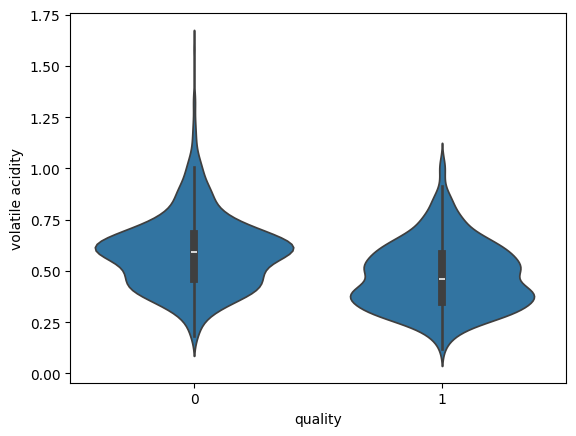

In [ ]:
sns.violinplot(x='quality', y='volatile acidity', data=wine_data)
plt.show()

It seems that there is a downward trend between the `Volatile Acidity` and the `Quality` of the wine, in the sense that good wines have lower `Volatile Acidity` values in general, but this is a pretty small difference.

Analyzing `Quality` and `Citric Acid`:

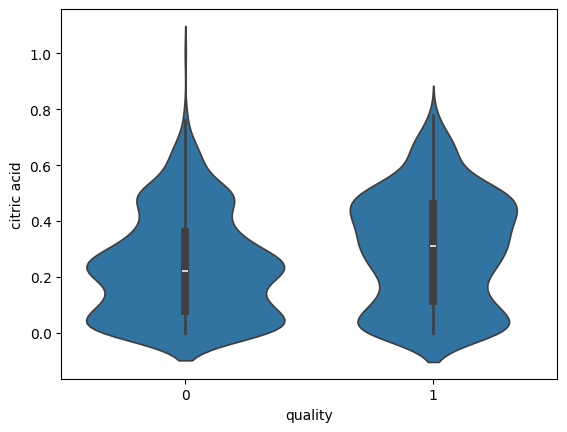

In [ ]:
sns.violinplot(x='quality', y='citric acid', data=wine_data)
plt.show()

Higher `quality` wines tend to have a bit of a higher `citric acid` value.

Analyzing `Quality` and `Residual Sugar`:


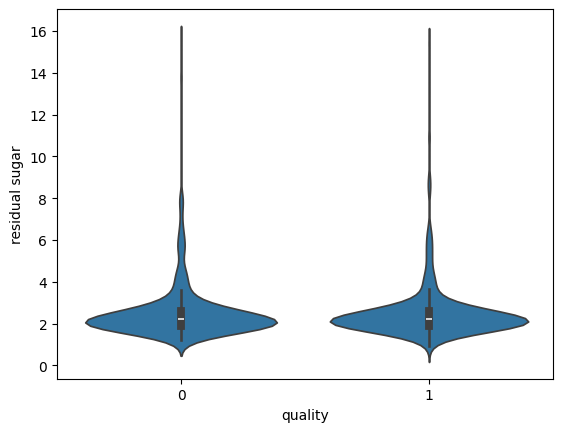

In [ ]:
sns.violinplot(x='quality', y='residual sugar', data=wine_data)
plt.show()

There doesn't seem to exist a relationship between `residual sugar` and `quality` neither.

Comparing `quality` and `chlorides`:

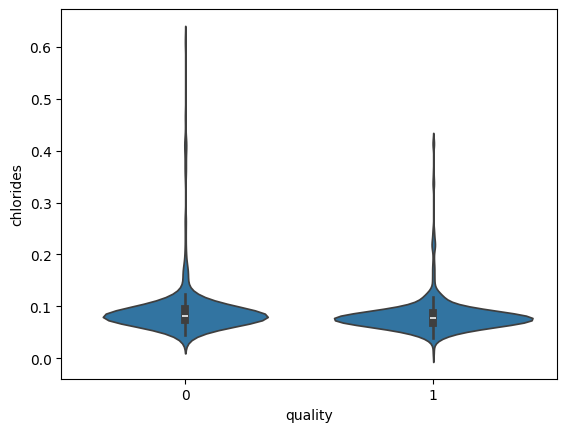

In [ ]:
sns.violinplot(x='quality', y='chlorides', data=wine_data)
plt.show()

There's also no relationship between `chlorides` and the `quality` of wine.

Comparing `quality` and `free sulfur dioxide`:

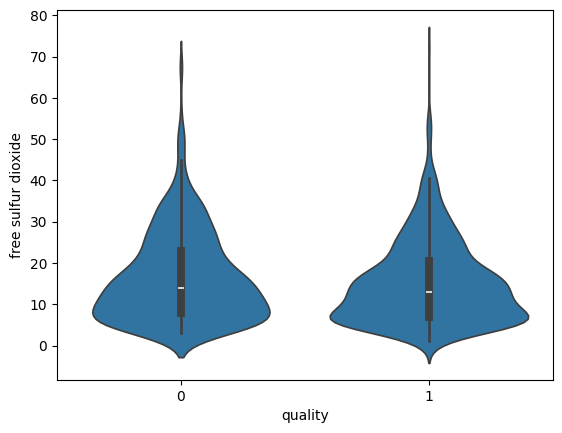

In [ ]:
sns.violinplot(x='quality', y='free sulfur dioxide', data=wine_data)
plt.show()

No clear relationship can be seen between the `free sulfur dioxide` variable and the `quality` variable.

Comparing `quality` and `total sulfur dioxide`:

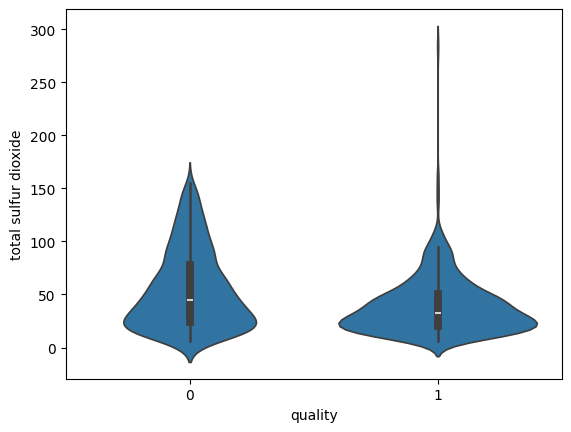

In [ ]:
sns.violinplot(x='quality', y='total sulfur dioxide', data=wine_data)
plt.show()

Higher `quality` wines tend to have smaller `total sulfur dioxide` values. Generating an extremely weak downward trend in the graph.

Comparing `quality` and `density`:

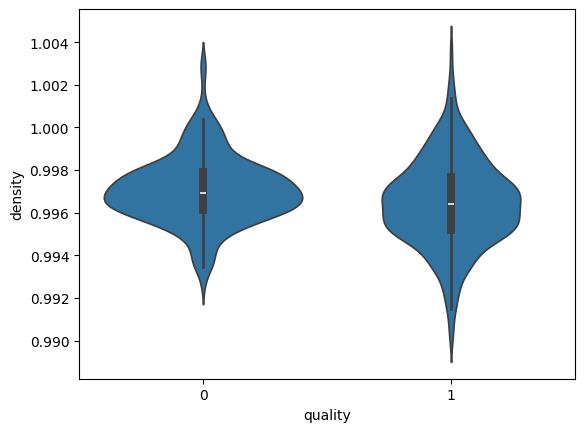

In [ ]:
sns.violinplot(x='quality', y='density', data=wine_data)
plt.show()

There isn't a clear trend between the `density` and the `quality` values.

Comparing `quality` and `pH`:

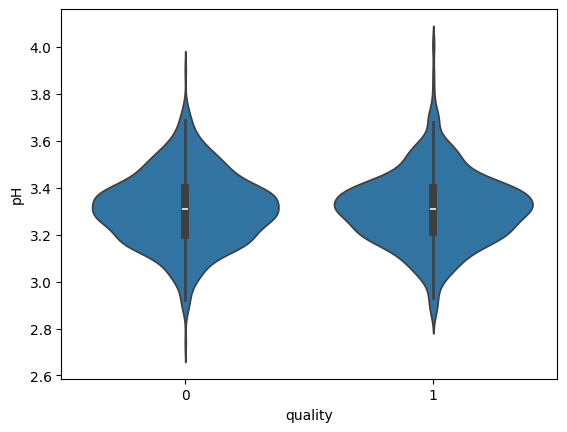

In [ ]:
sns.violinplot(x='quality', y='pH', data=wine_data)
plt.show()

No clear trend is found between `pH` and `quality`.

Comparing `quality` and `sulphates`:

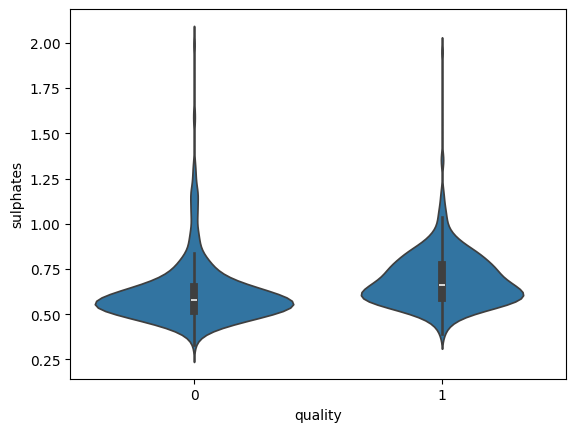

In [ ]:
sns.violinplot(x='quality', y='sulphates', data=wine_data)
plt.show()

Higher `quality` wines tend to have higher `sulphates` values.

Comparing `quality` and `alcohol`:

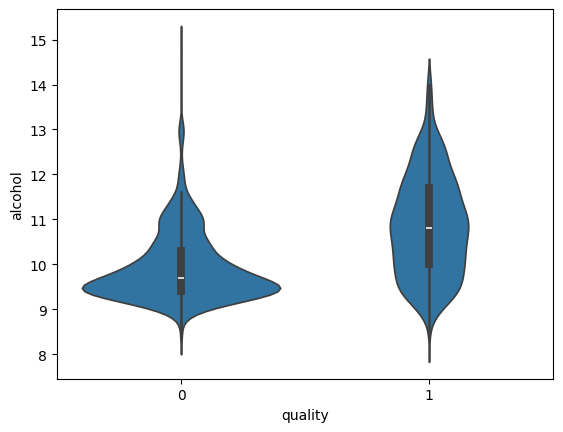

In [ ]:
sns.violinplot(x='quality', y='alcohol', data=wine_data)
plt.show()

There's a clear upward trend in the sense that higher `quality` wines have higher `alcohol` amounts.

### Variable Distribution

Now we will look at how these individual variables are distributed in our dataset:

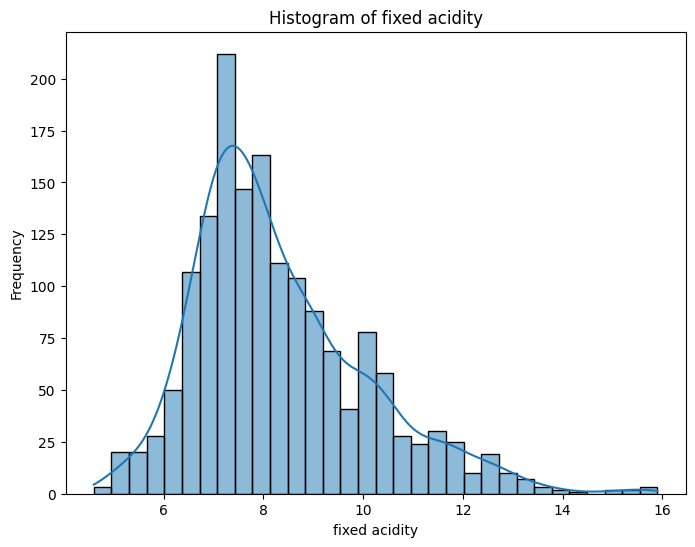

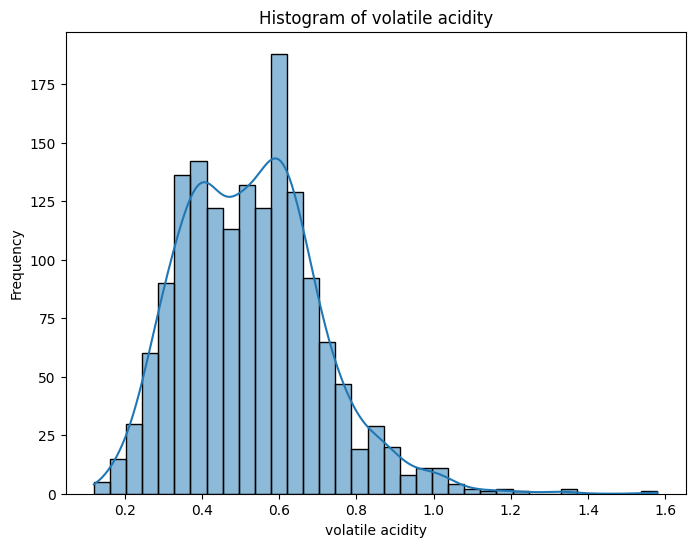

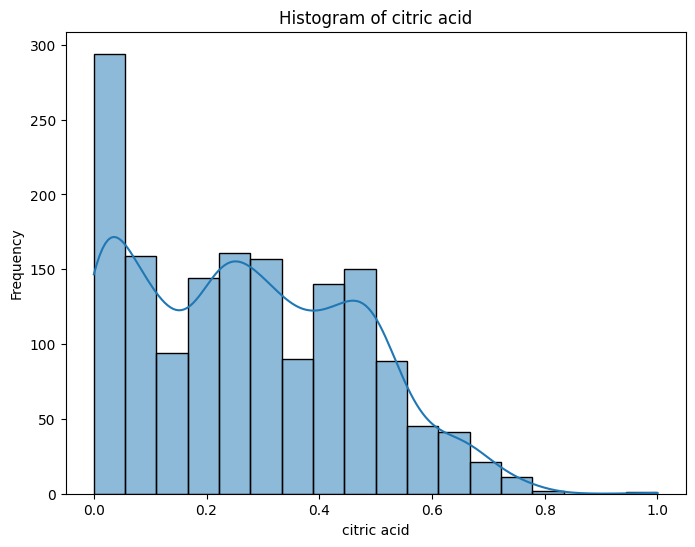

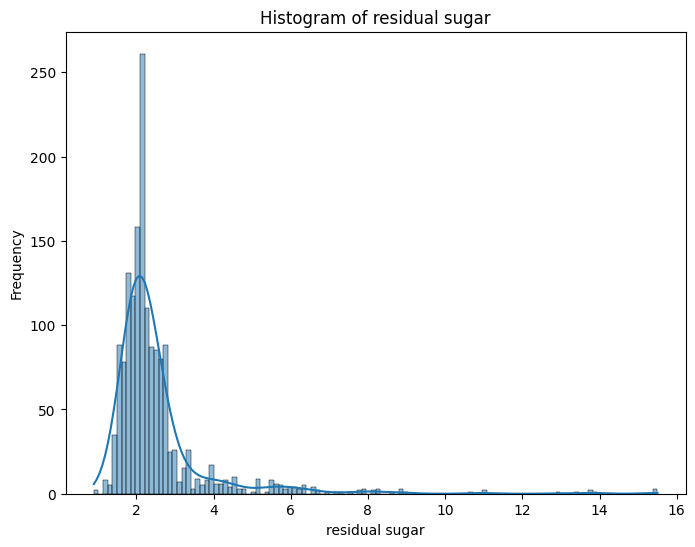

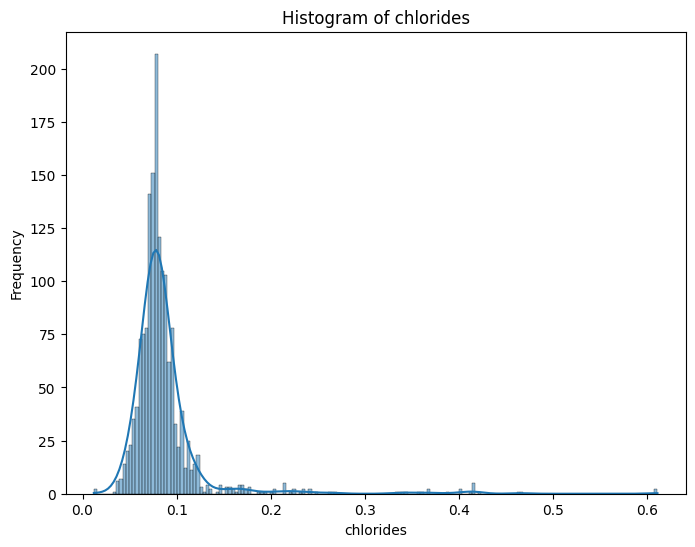

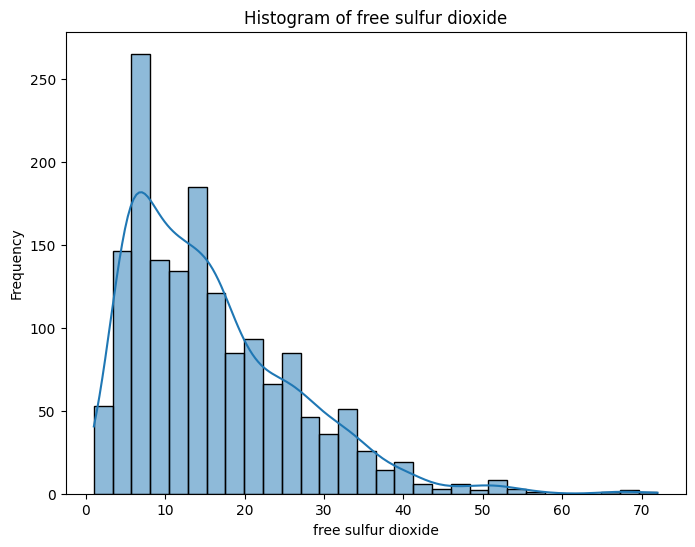

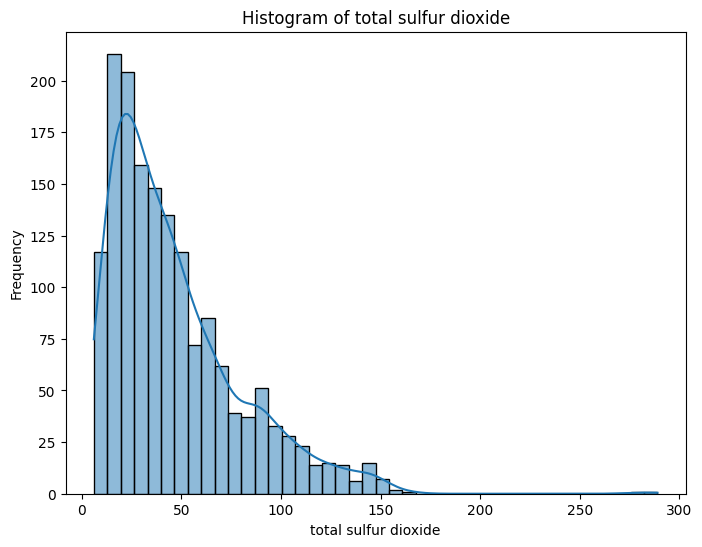

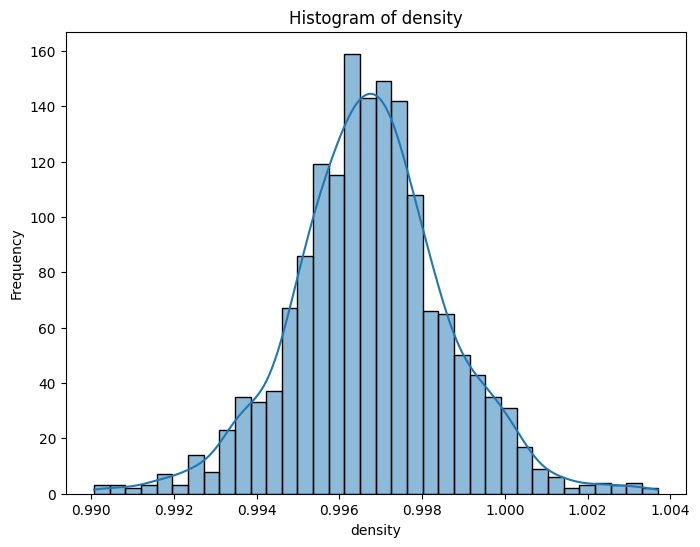

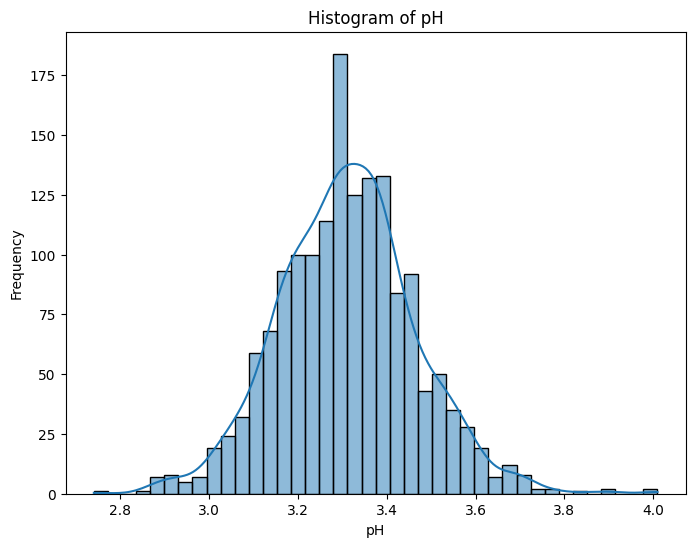

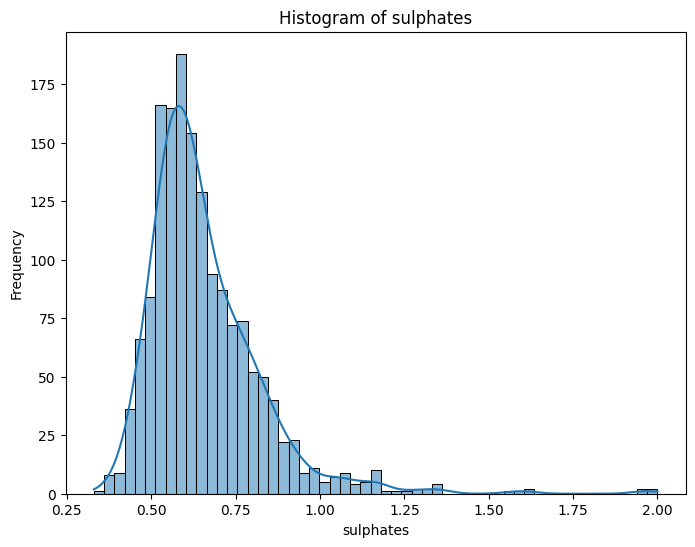

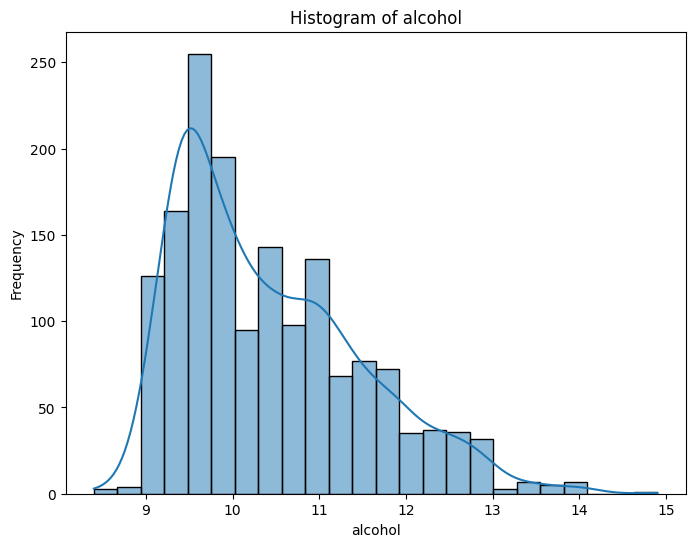

In [ ]:
for column in wine_data.columns:
  if column != 'quality':
    plt.figure(figsize=(8, 6))
    sns.histplot(wine_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

As it can be seen, a lot of our variables follow a somewhat normal distribution, with the following ones being the least similar to the bell-shaped curve:

* `volatile acidity`
* `citric acid`
* `free sulfur dioxide`
* `total sulfur dioxide`
* `alcohol`

#### Target Variable Distribution

Looking at the actual target variable, we will analyze its distribution of values (since in this case the variable is categorical, then the histogram returns the amount of values present in each class).

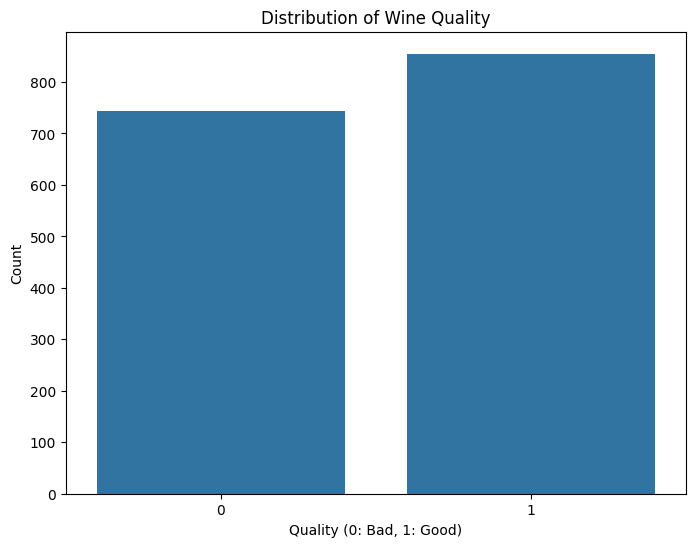

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality (0: Bad, 1: Good)')
plt.ylabel('Count')
plt.show()

The above graph shows that the dataset has more good quality wine than bad quality wine, noting that the difference is not that big.

This shows that maybe some upsampling of the bad quality wine class will be needed after the data split.

## Correlation Between Variables

In order to build our model, we need to analyze which variables cause the biggest effect on the wine quality. For this we will create a correlation heatmap that reveals this in a visual manner:

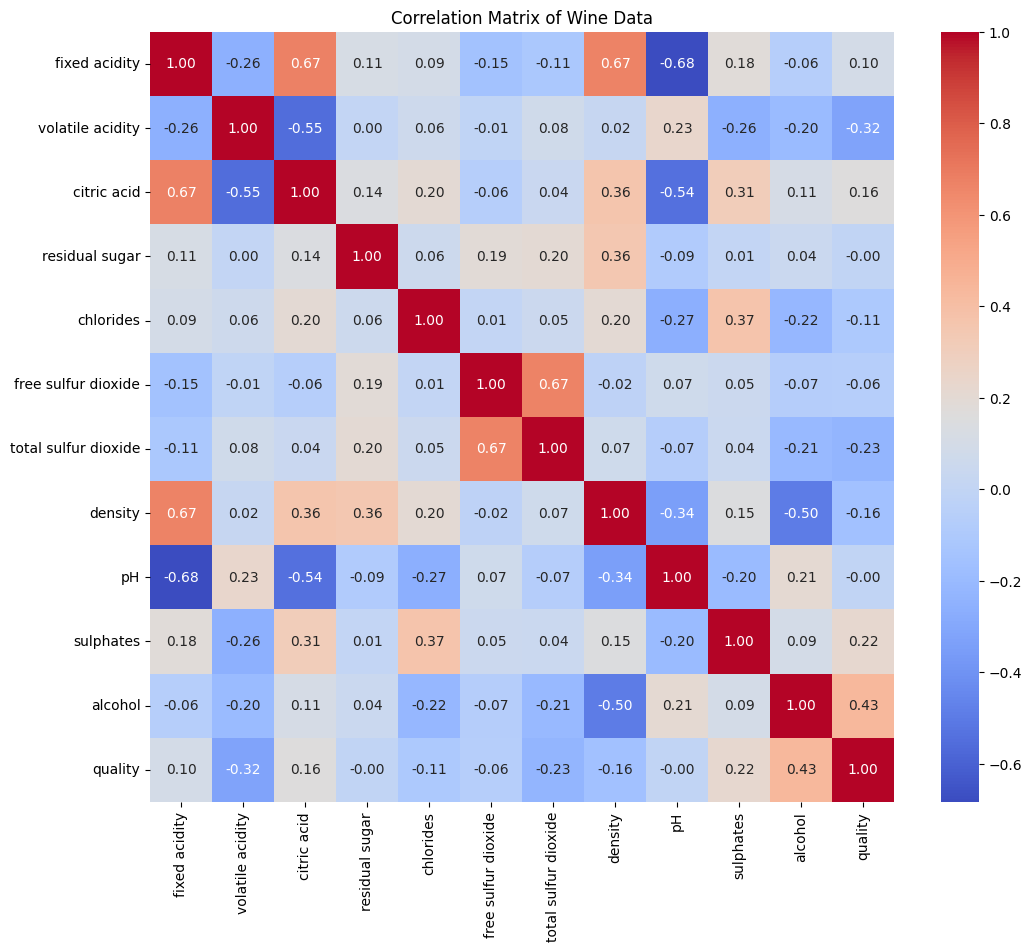

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Data')
plt.show()

No strong correlations are found to determine wine quality, except for `volatile acidity` and `alcohol`. Since those are very few variables and their correlation is not very strong, all features will be used to train the models.

## Outlier Detection

Now we will check to see if there are any outliers present in our data:

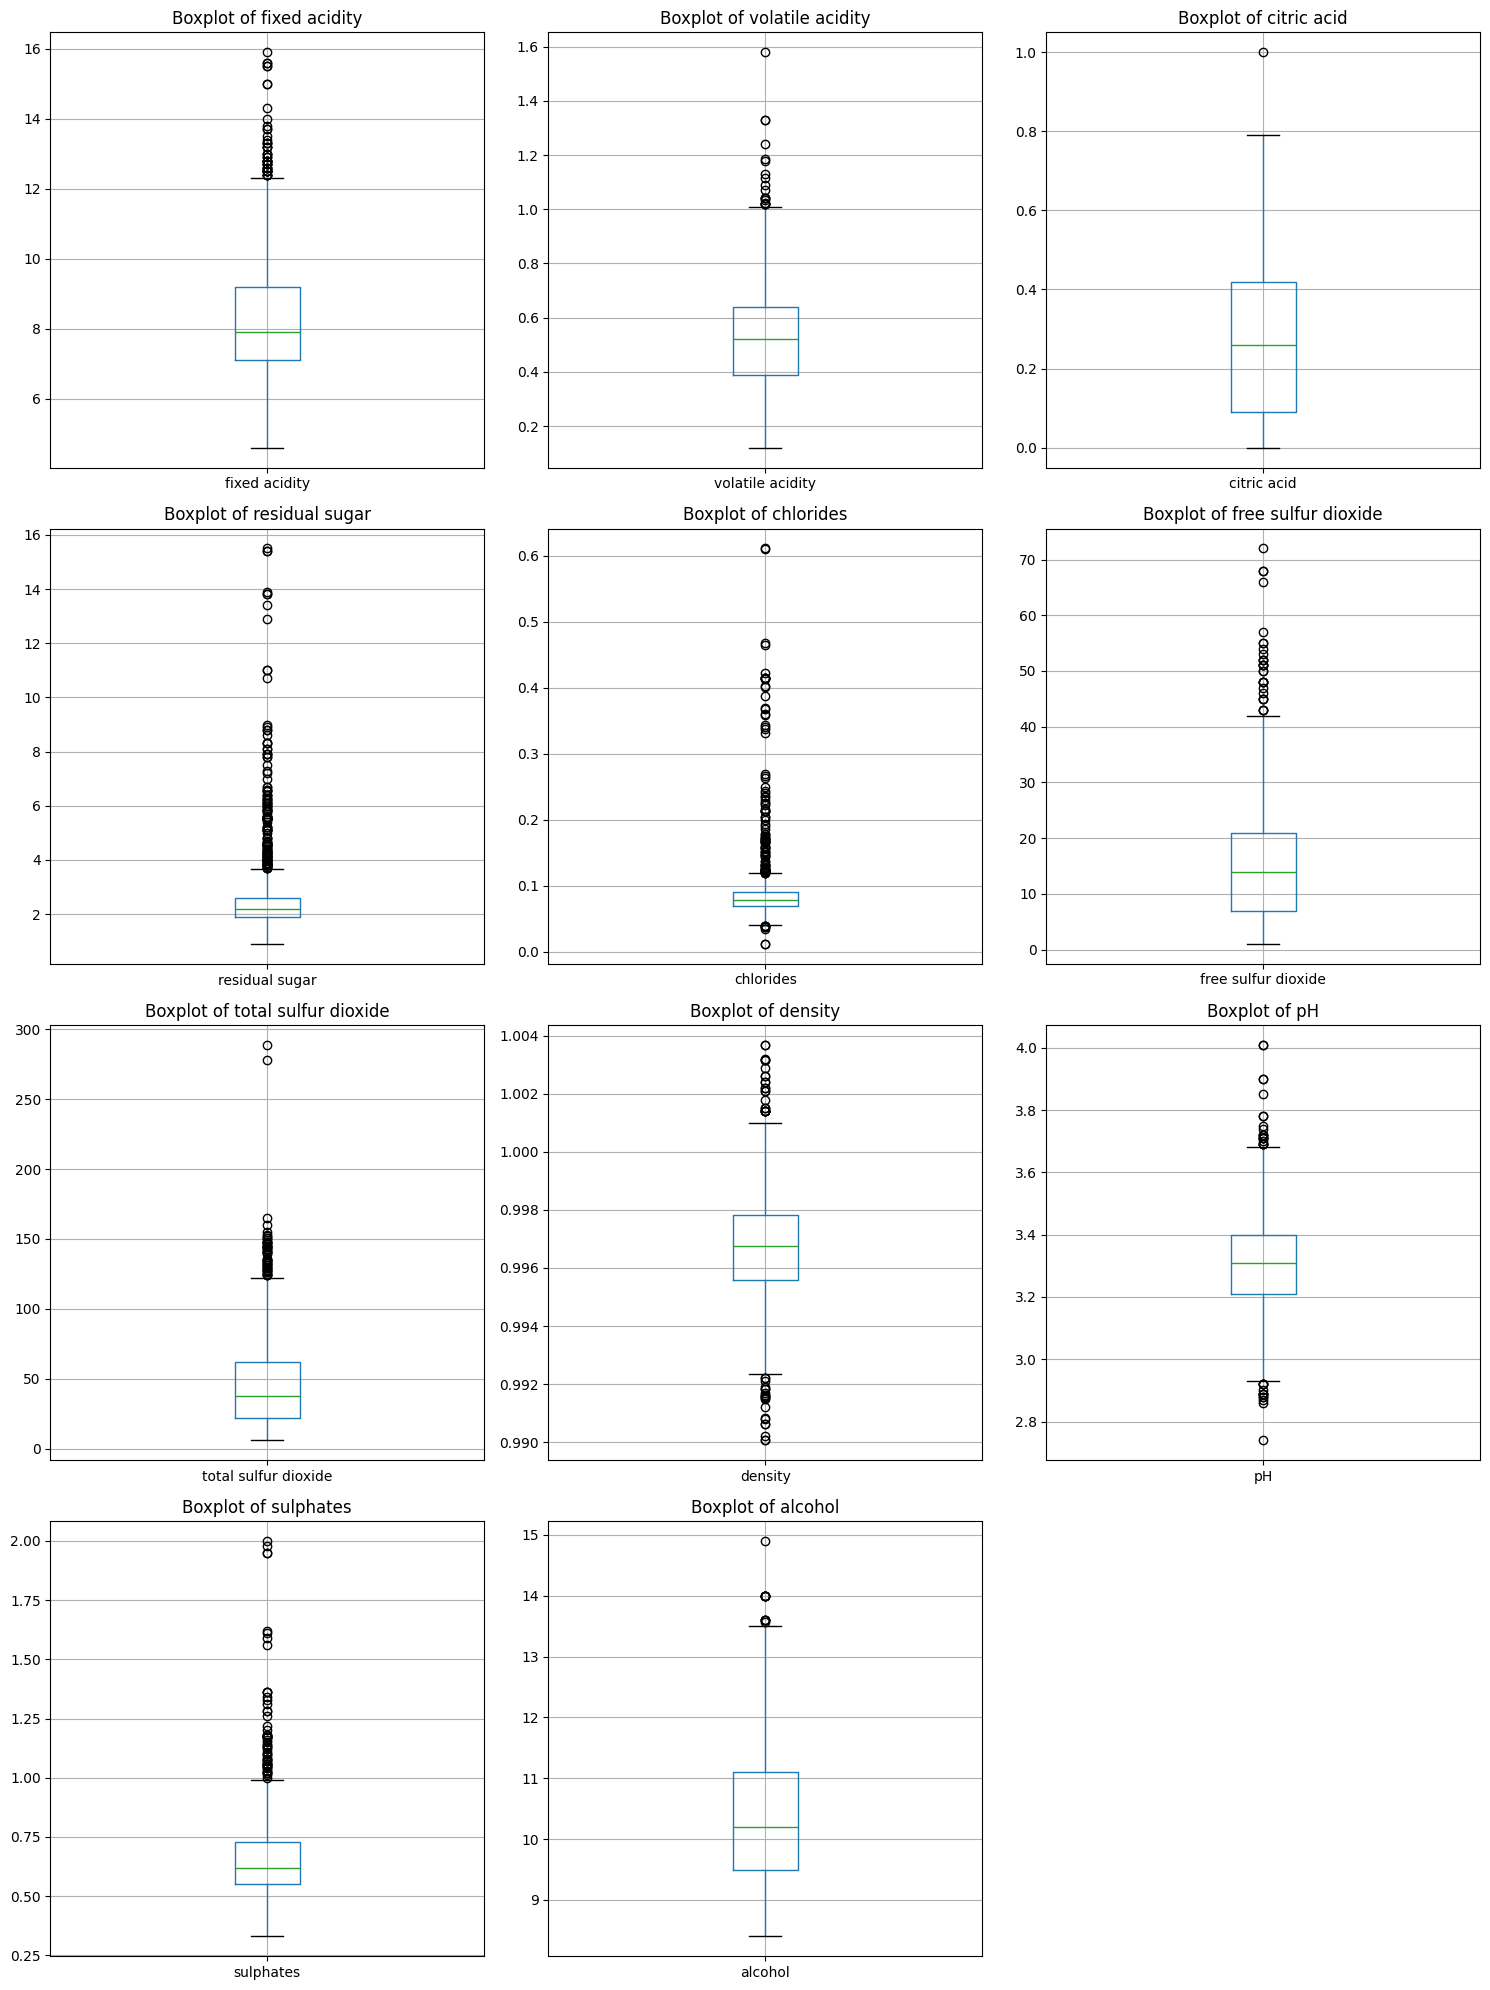

In [ ]:
# Get predtiction factors
num_columns = wine_data.select_dtypes(include=['float64']).columns

# Prepare the plot to load a boxplot for each factor
num_plots = len(num_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten()

# Create a boxplot for every factor
for i, column in enumerate(num_columns):
    wine_data.boxplot(column=[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Show plot
plt.tight_layout()
plt.show()

There is a considerable amount of outliers in our dataset, with them being strongly present in almost each variable except `citric acid`, since it just has one circle (outlier) in its boxplot.

## Outlier Deletion
Since a lot of our variables are somewhat normally distributed, then the z-score method will be used to delete outliers.

The z-score method consists on deleting those values that fall more than 3 standard deviations away from the mean value.


In [ ]:
import numpy as np

for column in wine_data.select_dtypes(include=np.number).columns:
    # Calculate the mean and standard deviation
    mean = wine_data[column].mean()
    std = wine_data[column].std()

    # Calculate the z-score for each value
    z_scores = (wine_data[column] - mean) / std

    # Remove values with z-scores greater than 3 or less than -3
    wine_data = wine_data[(z_scores <= 3) & (z_scores >= -3)]

Now, taking a look again at the barplots to check on how the data looks after outlier deletion:

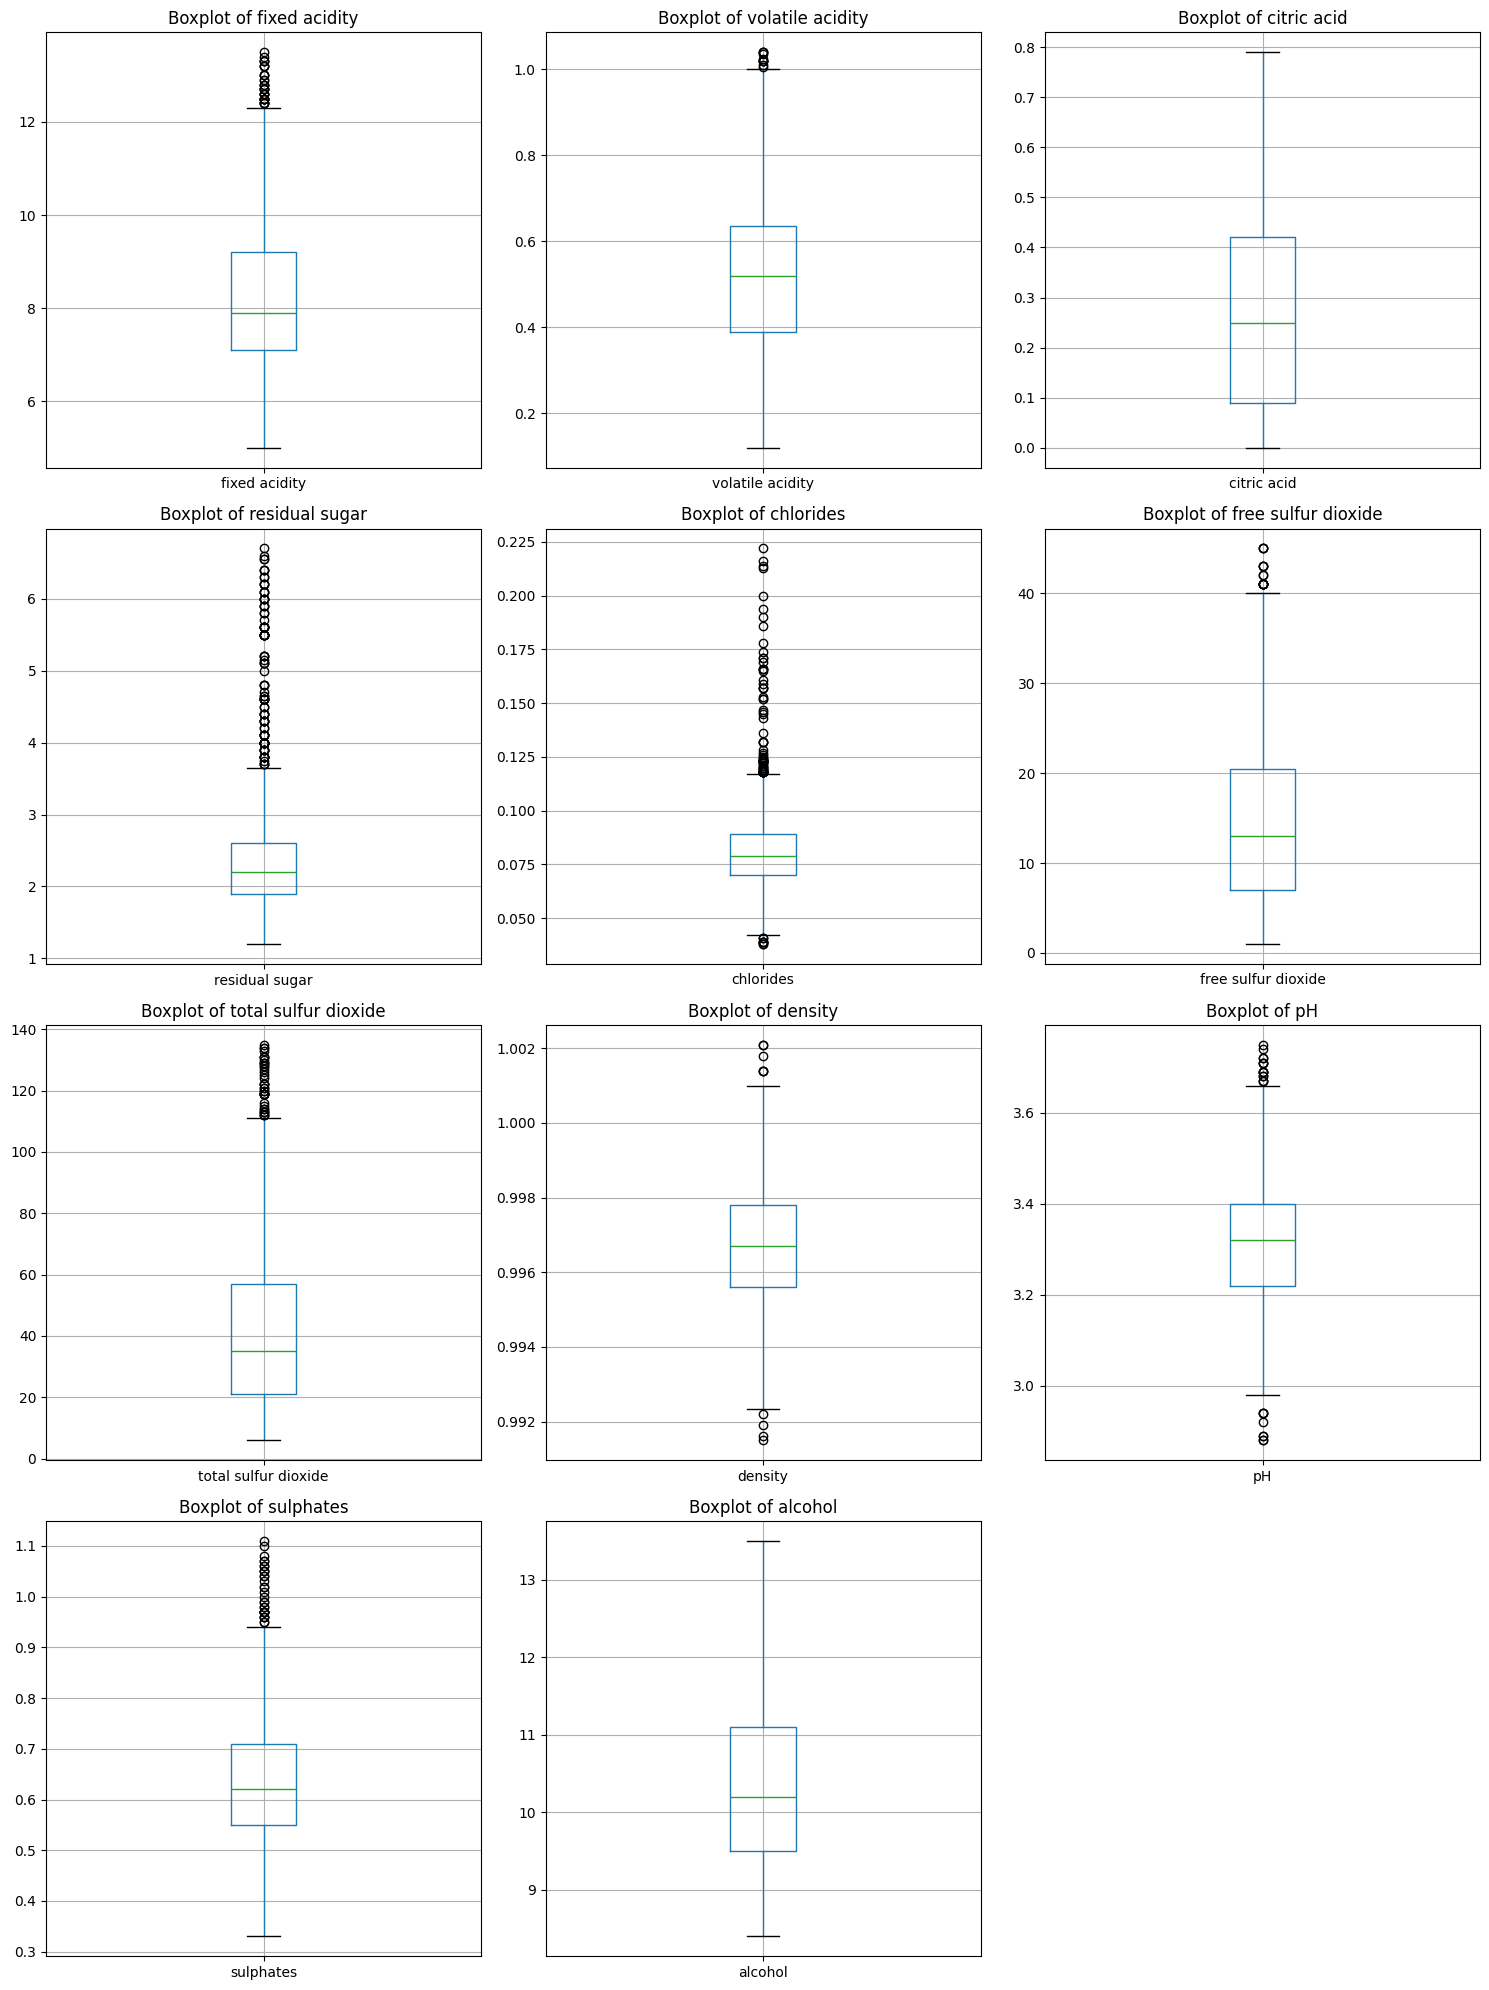

In [ ]:
# Get predtiction factors
num_columns = wine_data.select_dtypes(include=['float64']).columns

# Prepare the plot to load a boxplot for each factor
num_plots = len(num_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten()

# Create a boxplot for every factor
for i, column in enumerate(num_columns):
    wine_data.boxplot(column=[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Looking at the boxplots at plain sight, there doesn't seem to be much of a change after applying outlier deletion. However, when closely-inspected, the newly created boxplots have different scales than the ones that were created before outlier deletion, meaning that some actual values were deleted from the dataset.

This becomes even more evident when observing variables like `citric acid` and `alcohol`.

Observing the correlation heatmap once again, with the goal of watching how these changes possibly affect the correlation between variables:

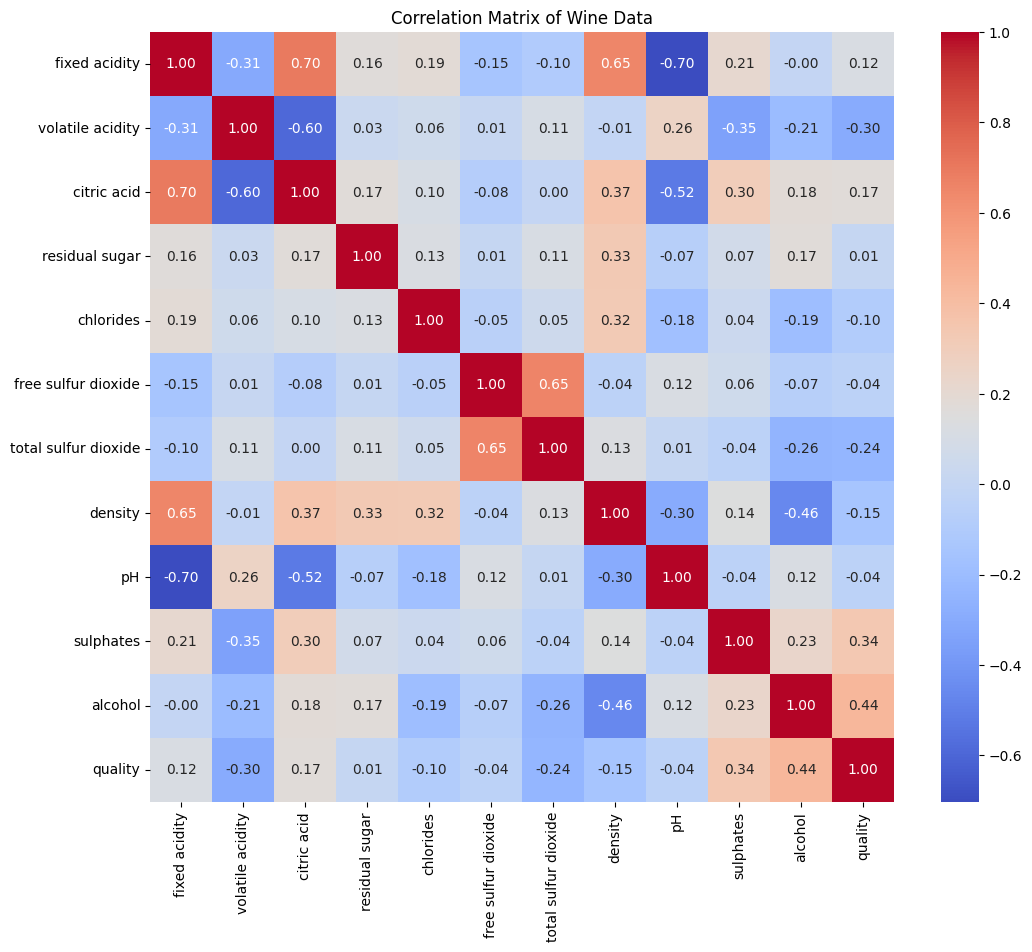

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Data')
plt.show()

There doesn't seem to be a strong difference between the original heatmap and this one. Meaning we can continue with our outliers being deleted.

## Data Split

Before we continue to manipulate our data, it is necessary to split it between a training set and a testing set. This is due to data leakage, since we want to avoid mixing any information between the two sets.

We will use a 80% training, 20% testing proportion, with stratification on the `wine_quality` column to preserve the category proportion between the sets.

In [ ]:
from sklearn.model_selection import train_test_split

y = wine_data['quality']
X = wine_data.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## Data Imbalance

Given the fact that the amount of good quality wine is not the same as the amount of bad quality wine, our data is imbalanced. This imbalance may cause a negative effect on the models' performance, we will use upsampling to correct this.

First we need to know which category is the one that needs upsampling.

In [ ]:
y_train.value_counts()

,count
quality,
1,620
0,524


Seeing that the bad quality wine class is the one that needs upsampling, we will apply random over sampling to achieve our goal:

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Perform random upsampling
X_train, y_train = ros.fit_resample(X_train, y_train)

# Check the distribution of the target variable
print(y_train.value_counts())


quality
1    620
0    620
Name: count, dtype: int64


As per the output, now our wine `quality` variables have the same count of observations.

Since we can't modify the `y_test` variable, we can just look at how these variables are distributed:

In [ ]:
y_test.value_counts()

,count
quality,
1,156
0,131


Seeing that both classes are similarly distributed, with the good quality class having a bit more observations.

## Data Scaling

Since neural networks have a non-linear nature, we will use normalization. On the other hand, standardization is better for linear models when a Gaussian distribution is present (which in our dataset it is, in most columns).

Normalizing for neural networks becomes key since this affects their convergence time towards a solution.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

We'll only scale the feature values:

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

X_train_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_test_standardized = pd.DataFrame(X_test_standardized, columns=X_test.columns)

In [ ]:
X_train_normalized.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.390712,0.438867,0.333218,0.219837,0.236251,0.324102,0.291592,0.495563,0.503365,0.395606,0.386991
std,0.195248,0.180492,0.241914,0.157489,0.111529,0.209650,0.221287,0.158933,0.162623,0.163972,0.194954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247059,0.304348,0.113924,0.130841,0.173913,0.136364,0.116279,0.388679,0.390805,0.282051,0.215686
50%,0.341176,0.434783,0.316456,0.186916,0.222826,0.272727,0.240310,0.496226,0.505747,0.371795,0.333333
75%,0.485294,0.554348,0.531646,0.261682,0.271739,0.454545,0.403101,0.594340,0.609195,0.487179,0.509804
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train_standardized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.856600,-0.685348,0.349454,-0.209123,-0.022920,0.730896,-0.266882,-1.100328,0.651033,0.871570,0.730827
1,-0.916880,0.881051,-1.377975,-0.565322,-0.071669,0.730896,-0.161746,0.152631,0.580325,0.793351,-0.677814
2,0.047592,-1.408302,0.715878,-0.802788,-0.705412,-0.787395,-0.827607,-0.429312,0.509616,-0.301709,0.127124
3,-0.675762,0.579820,-1.063897,0.147076,-0.169168,0.188649,1.415295,0.419849,1.358121,-0.849239,-0.677814
4,1.253181,-1.709532,1.029957,-0.684055,-0.315416,-1.004293,-0.792562,0.502984,-0.480306,2.983471,0.428976


We can appreciate the change in scales with the boxplots from before.

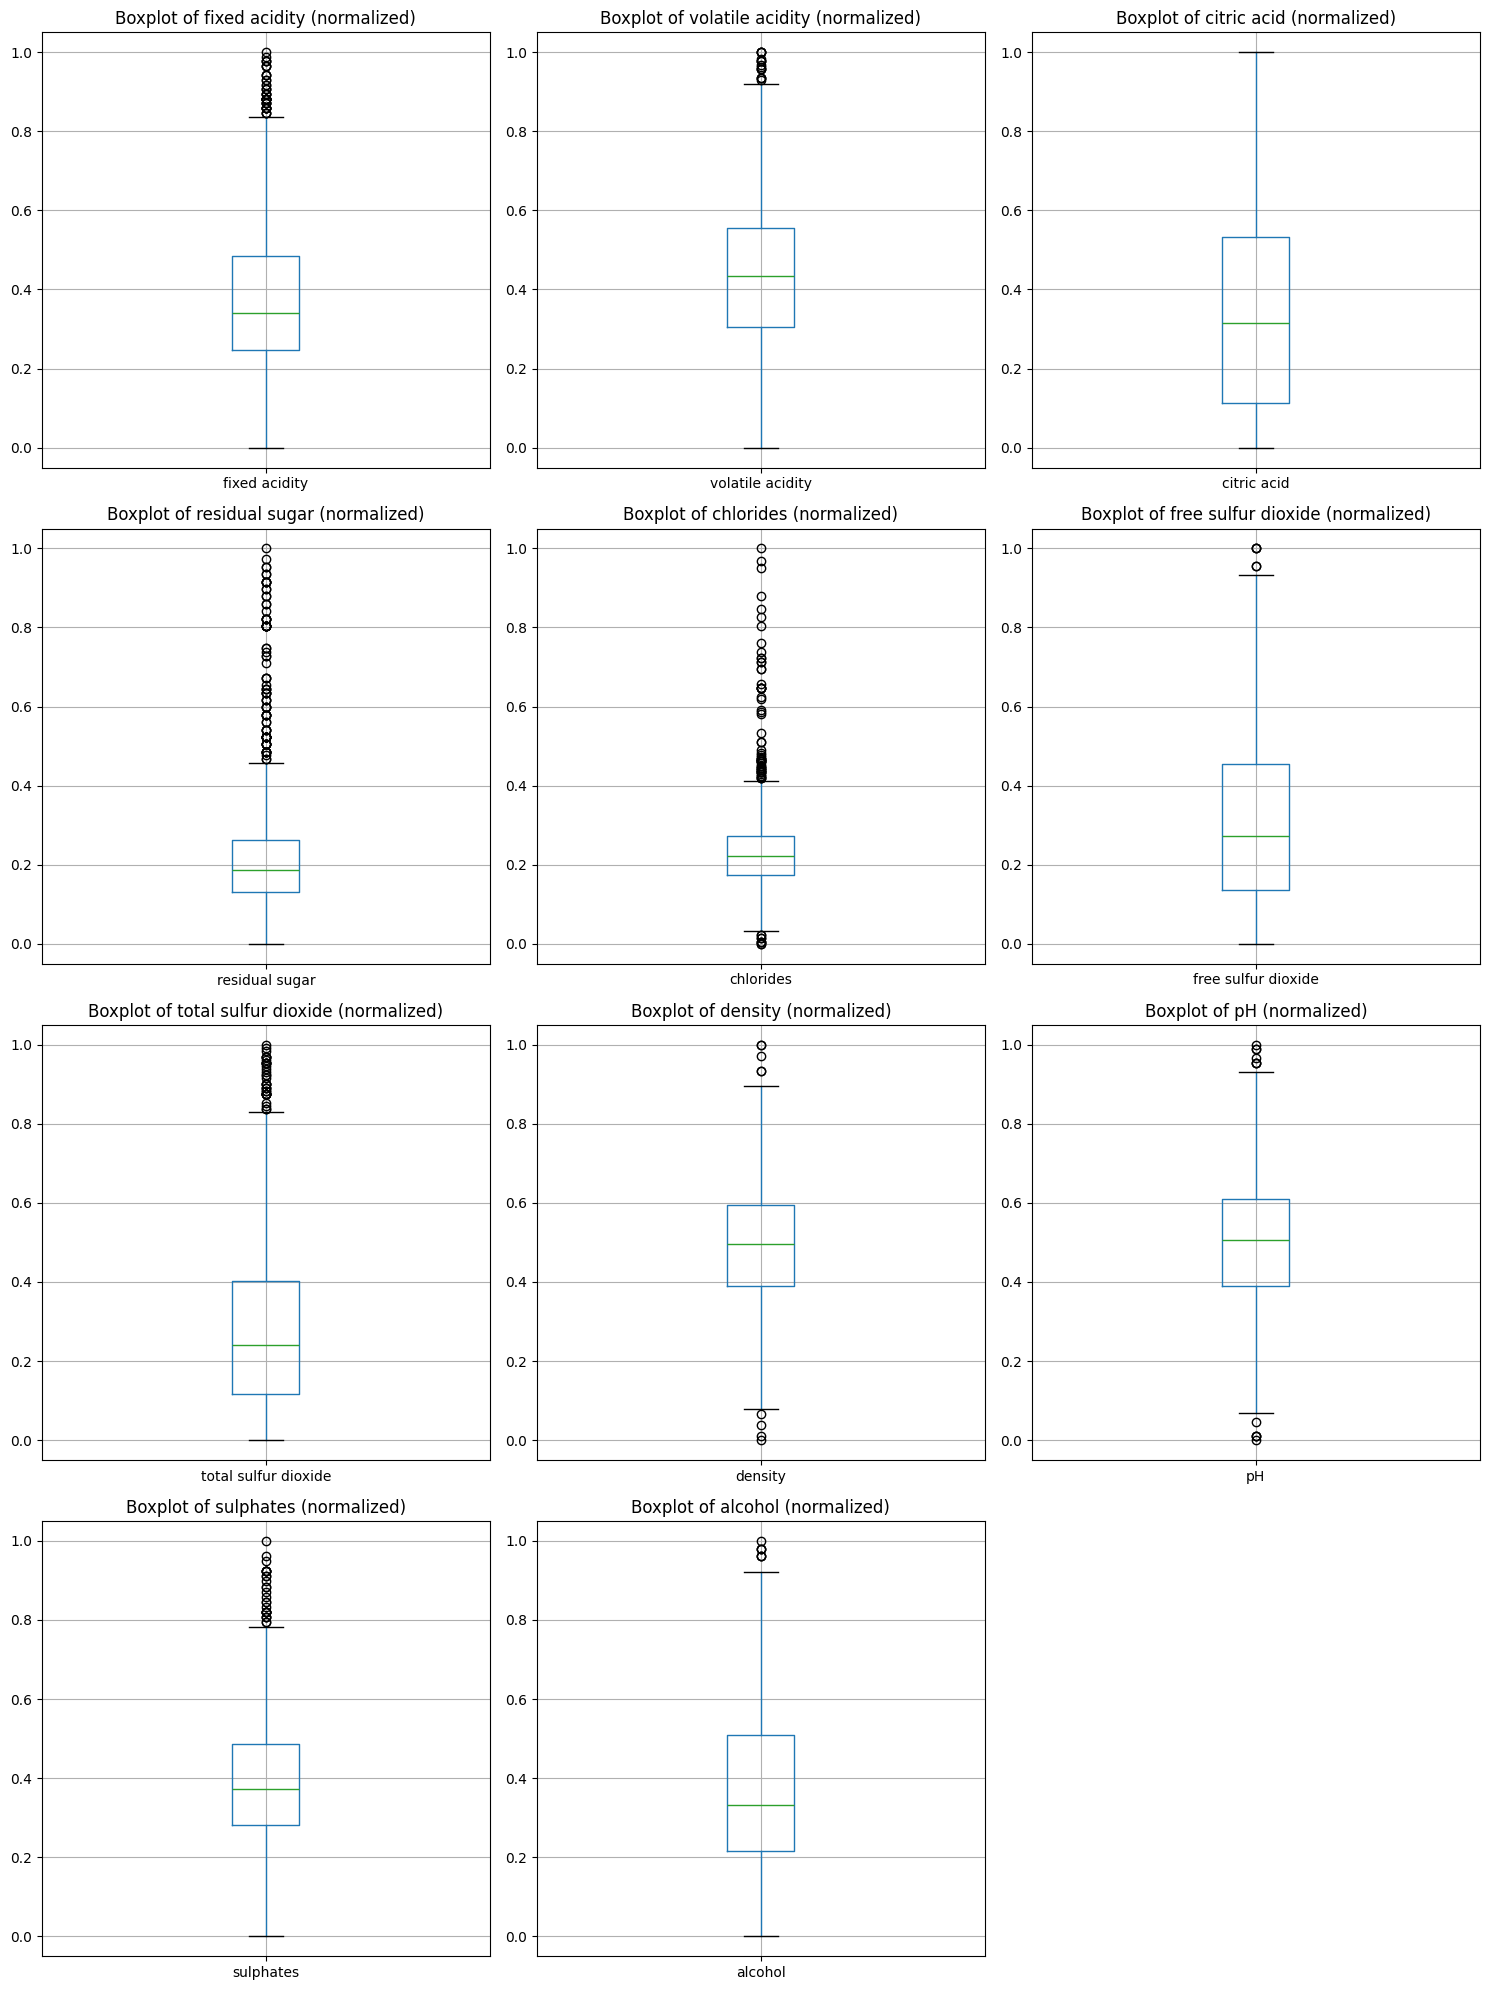

In [ ]:
# Prepare the plot to load a boxplot for each factor
num_plots = len(num_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten()

# Create a boxplot for every factor
for i, column in enumerate(num_columns):
    pd.DataFrame(X_train_normalized, columns=num_columns).boxplot(column=[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} (normalized)')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Show plot
plt.tight_layout()
plt.show()

# Model Implementation

## Metrics

To measure the performance of the models, we will mainly use the  accuracy and f1 score values, but we will also have the ROC AUC, precision and recall metrics as supporting values.

The confusion matrices will also be printed.

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score, accuracy_score
)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

We will also use this function to print the performance results for an individual model:

In [ ]:
def evaluate_best_model(model, X_train_set=X_train_standardized, y_train_set=y_train, X_test_set=X_test_standardized, y_test_set=y_test):
    start_time = time.time()
    y_pred = model.predict(X_test_set)
    end_time = time.time()
    prediction_time = end_time - start_time

    # Evaluate accuracy on training and test sets
    train_accuracy = model.score(X_train_set, y_train_set)
    test_accuracy = model.score(X_test_set, y_test_set)

    # Print the accuracy
    print(f"Training accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_set, y_pred))

    # Print the classification report
    print("Classification Report for the best model:")
    print(classification_report(y_test_set, y_pred))

    # Compute ROC AUC
    y_prob = model.predict_proba(X_test_set)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test_set, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test_set, y_prob)

    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    # Print prediction time
    print(f"Prediction time: {prediction_time:.4f} seconds")

    return test_accuracy, prediction_time, roc_auc

And this to print out the elapsed training time:

In [ ]:
def print_elapsed_time(start_time, end_time):
    elapsed_time = end_time - start_time

    minutes, seconds = divmod(elapsed_time, 60)
    print(f"Total training time: {int(minutes):02d}:{int(seconds):02d} (mm:ss)")

## Logistic Regression

We will start with logistic regression, the simplest model to implement.

Importing the LogisticRegression package.

In [ ]:
from sklearn.linear_model import LogisticRegression

Training the model:

In [ ]:
model_lr = LogisticRegression()

start_time = time.time()
model_lr.fit(X_train_normalized, y_train)
end_time = time.time()

print_elapsed_time(start_time, end_time)

Total training time: 00:00 (mm:ss)


Using our trained model to predict upon the 5 train and test splits:

Total training time: 00:00 (mm:ss)
Total training time: 00:00 (mm:ss)
Total training time: 00:00 (mm:ss)
Total training time: 00:00 (mm:ss)
Total training time: 00:00 (mm:ss)

Summary of accuracy per fold:
Fold 1: Accuracy = 0.7379
Fold 2: Accuracy = 0.7419
Fold 3: Accuracy = 0.7540
Fold 4: Accuracy = 0.7339
Fold 5: Accuracy = 0.7016
Mean Accuracy: 0.7339
Standard Deviation of Accuracy: 0.0175


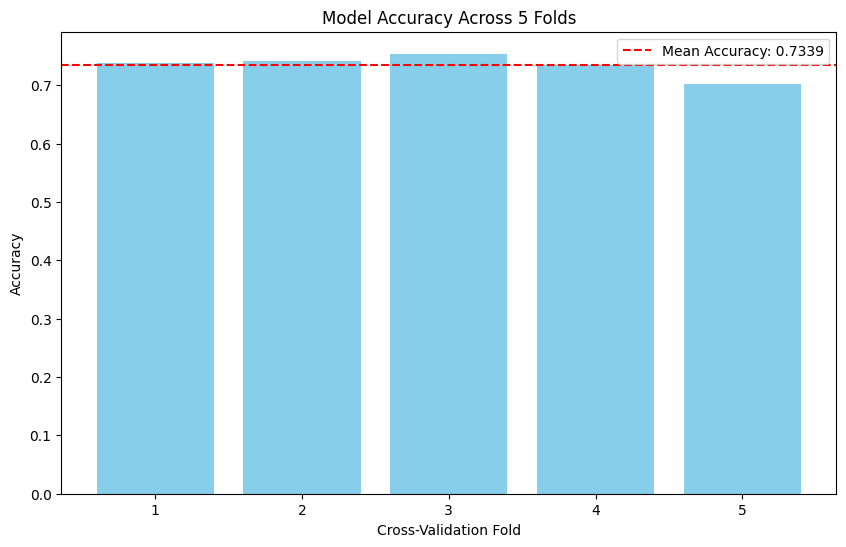

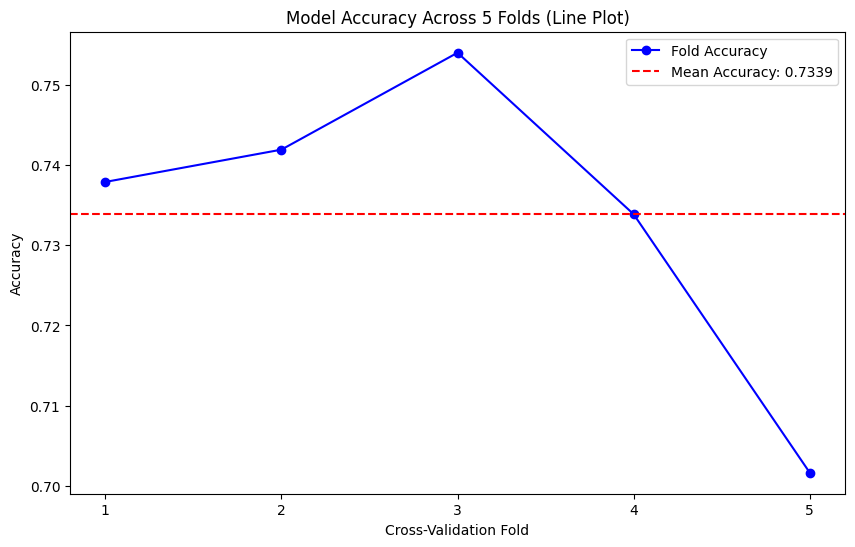


The best model was from fold 3 with accuracy: 0.7540


In [ ]:
# Ensure the data is in NumPy format
X_train_normalized = np.array(X_train_normalized)
y_train = np.array(y_train)

# Set up 5 splits with an 80/20 split
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_lr = LogisticRegression()

# Lists to store times, accuracy scores, and trained models
fit_times = []
accuracy_scores = []
models = []

# Loop through the splits
for fold, (train_idx, test_idx) in enumerate(kf.split(X_train_normalized, y_train)):
    # Split the dataset
    X_train_fold, X_test_fold = X_train_normalized[train_idx], X_train_normalized[test_idx]
    y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

    # Train the model and measure time
    start_time = time.time()
    model_lr.fit(X_train_fold, y_train_fold)
    end_time = time.time()

    # Store and print elapsed time
    fit_times.append(end_time - start_time)
    print_elapsed_time(start_time, end_time)

    # Predict on the test fold and calculate accuracy
    y_pred = model_lr.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(accuracy)
    models.append(model_lr)


# Summary of accuracy
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print("\nSummary of accuracy per fold:")
for i, acc in enumerate(accuracy_scores, 1):
    print(f"Fold {i}: Accuracy = {acc:.4f}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

# Bar Plot for Visual Representation of Accuracy
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), accuracy_scores, color='skyblue')
plt.axhline(mean_accuracy, color='r', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across 5 Folds')
plt.xticks(range(1, 6))
plt.legend()
plt.show()

# Line Plot for Accuracy Across Folds
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), accuracy_scores, marker='o', color='b', linestyle='-', label='Fold Accuracy')
plt.axhline(mean_accuracy, color='r', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across 5 Folds (Line Plot)')
plt.xticks(range(1, 6))
plt.legend()
plt.show()

# Get the best performing model
best_fold = np.argmax(accuracy_scores)
best_model = models[best_fold]
print(f"\nThe best model was from fold {best_fold + 1} with accuracy: {accuracy_scores[best_fold]:.4f}")

Once the model is trained, we will proceed with evaluating our model with the testing data:

Training accuracy: 0.7419
Test accuracy: 0.7596
Confusion Matrix:
[[110  21]
 [ 48 108]]
Classification Report for the best model:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.84      0.69      0.76       156

    accuracy                           0.76       287
   macro avg       0.77      0.77      0.76       287
weighted avg       0.77      0.76      0.76       287

ROC AUC Score: 0.8368


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


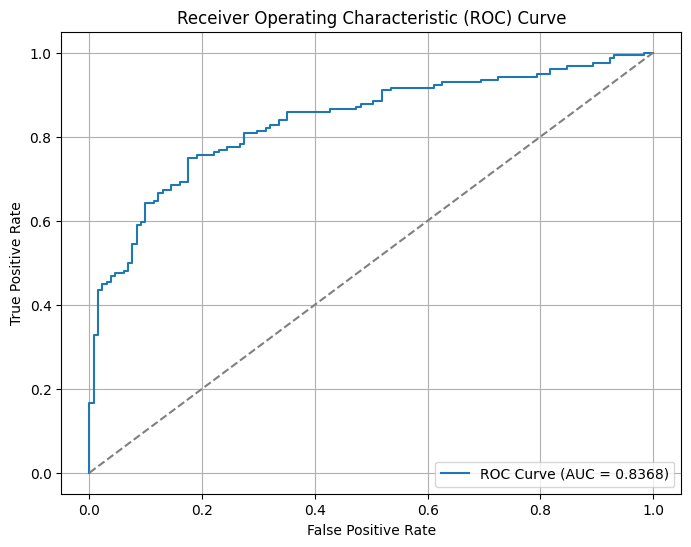

Prediction time: 0.0042 seconds


In [ ]:
lr_accuracy, lr_prediction_time, lr_roc_auc = evaluate_best_model(best_model, X_test_set=X_test_normalized)

The metrics are as follows:

| Metric             | Value   |
|---------------------|---------|
| **Training Accuracy** | 0.7419 |
| **Test Accuracy**     | 0.7596 |
| **Precision**         | 0.77   |
| **Recall**            | 0.76   |
| **F1-Score**          | 0.76   |
| **ROC AUC**          | 0.8368   |

|                | Predicted 0 | Predicted 1 |
|----------------|-------------|-------------|
| **Actual 0**   | 110         | 21          |
| **Actual 1**   | 48          | 108         |



Comparing the training and testing accuracy, there is no significant difference between to say there is overfitting. Analyzing the f1-score (and the precision and recall), the model is identifies the wine quality fairly good. Although, there is a lot of room for improvement, as we can see in the confusion matrix.

## KNN

We will continue with a bit more complex model, which is KNN. This model will ensure better adaptability to non linear data, since the classification depends on the sample's neighbors.

We will use a an amount of neighbors that ranges from 5 to 50 in increments of 5. In order to know which hyperparameter is the best, we will use the Grid Search library, that will compute all combinatios and pick the best one.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Training the model with the 5 folds:

--- Executing fold 1 ---
Total training time: 00:03 (mm:ss)
Best parameters for fold 1: {'n_neighbors': 16}
Accuracy for fold 1: 0.7339
--- Executing fold 2 ---
Total training time: 00:01 (mm:ss)
Best parameters for fold 2: {'n_neighbors': 46}
Accuracy for fold 2: 0.7419
--- Executing fold 3 ---
Total training time: 00:01 (mm:ss)
Best parameters for fold 3: {'n_neighbors': 11}
Accuracy for fold 3: 0.6855
--- Executing fold 4 ---
Total training time: 00:00 (mm:ss)
Best parameters for fold 4: {'n_neighbors': 46}
Accuracy for fold 4: 0.7379
--- Executing fold 5 ---
Total training time: 00:00 (mm:ss)
Best parameters for fold 5: {'n_neighbors': 11}
Accuracy for fold 5: 0.7097
Mean Accuracy: 0.7218
Standard Deviation of Accuracy: 0.0213


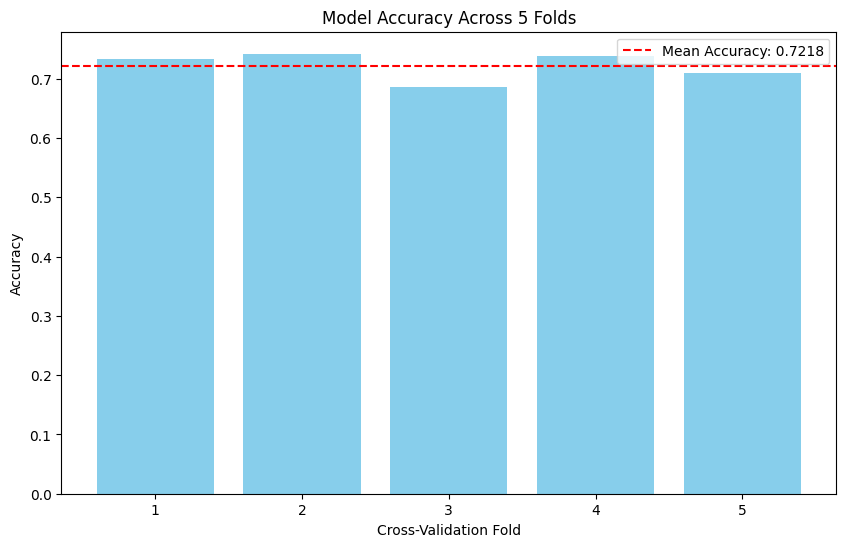


The best model was from fold 2 with accuracy: 0.7419


In [ ]:

# Ensure the data is in NumPy format
X_train_standardized = np.array(X_train_standardized)
y_train = np.array(y_train)

# Set up 5 splits with an 80/20 split
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_knn = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': range(6, 50, 5),
}

# Lists to store times, accuracy scores, and best models
fit_times = []
accuracy_scores = []
best_models = []

# Loop through the splits
for fold, (train_idx, test_idx) in enumerate(kf.split(X_train_standardized, y_train)):
    print(f"--- Executing fold {fold + 1} ---")

    # Split the dataset
    X_train_fold, X_test_fold = X_train_standardized[train_idx], X_train_standardized[test_idx]
    y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

    # Set up GridSearchCV for KNN
    grid_search = GridSearchCV(model_knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

    # Train the model using GridSearchCV and measure time
    start_time = time.time()
    grid_search.fit(X_train_fold, y_train_fold)
    end_time = time.time()

    # Store and print elapsed time
    fit_times.append(end_time - start_time)
    print_elapsed_time(start_time, end_time)

    # Get the best model from the current fold
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Predict on the test fold using the best model
    y_pred = best_model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Best parameters for fold {fold + 1}: {grid_search.best_params_}")
    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")

# Summary of accuracy
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

# Bar Plot for Visual Representation of Accuracy
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), accuracy_scores, color='skyblue')
plt.axhline(mean_accuracy, color='r', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across 5 Folds')
plt.xticks(range(1, 6))
plt.legend()
plt.show()

# Get the best performing model overall
best_fold = np.argmax(accuracy_scores)
best_model = best_models[best_fold]
print(f"\nThe best model was from fold {best_fold + 1} with accuracy: {accuracy_scores[best_fold]:.4f}")

Now that the model is trained, we can see which amount of neighbors has the bes accuracy.

In [ ]:
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'n_neighbors': 11}


It appears that 10 neighbors had the best training accuracy. Now we will proceed to test the model.

Training accuracy: 0.7613
Test accuracy: 0.7526
Confusion Matrix:
[[102  29]
 [ 42 114]]
Classification Report for the best model:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       131
           1       0.80      0.73      0.76       156

    accuracy                           0.75       287
   macro avg       0.75      0.75      0.75       287
weighted avg       0.76      0.75      0.75       287

ROC AUC Score: 0.8408


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


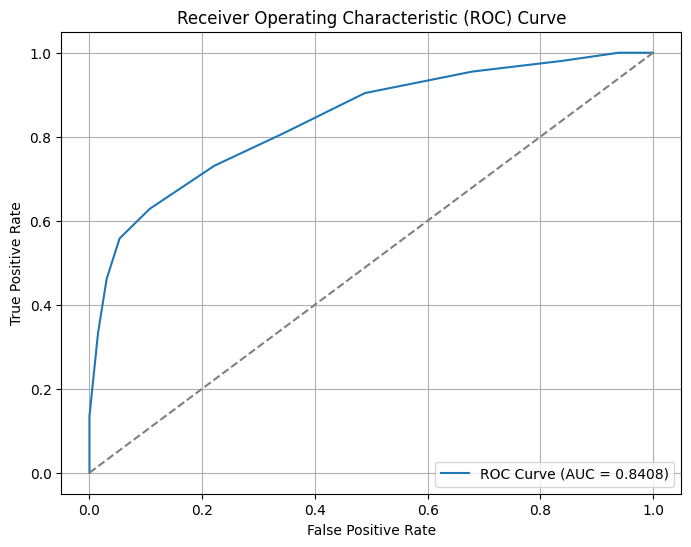

Prediction time: 0.0280 seconds


In [ ]:
knn_accuracy, knn_prediction_time, knn_roc_auc = evaluate_best_model(best_model, X_test_set=X_test_standardized)

Looking at the metrics:

| Metric             | Value   |
|---------------------|---------|
| **Training Accuracy** | 0.7613 |
| **Test Accuracy**     | 0.7526 |
| **Precision**         | 0.76   |
| **Recall**            | 0.75   |
| **F1-Score**          | 0.75   |
| **ROC AUC**          | 0.8408   |

|                | Predicted 0 | Predicted 1 |
|----------------|-------------|-------------|
| **Actual 0**   | 102         | 29          |
| **Actual 1**   | 42          | 114         |


Since the Training and Test accuracy are very similar, the model doesn't seem to be overfitted. It also appears to be classifying the wines with lower precision, recall and F1-score values. This model performs worse than Logistic Regression.

## Decision Tree

Now we will implement a higher complexity model, a decision tree. This model will classify the wine quality by constructing a binary tree with the training data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Training with the 5 splits:

--- Executing fold 1 ---


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Total training time: 00:01 (mm:ss)
Best parameters for fold 1: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 20, 'splitter': 'best'}
Accuracy for fold 1: 0.7460
--- Executing fold 2 ---


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Total training time: 00:01 (mm:ss)
Best parameters for fold 2: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 64, 'min_samples_split': 20, 'splitter': 'best'}
Accuracy for fold 2: 0.6815
--- Executing fold 3 ---


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Total training time: 00:01 (mm:ss)
Best parameters for fold 3: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 32, 'min_samples_split': 20, 'splitter': 'best'}
Accuracy for fold 3: 0.7339
--- Executing fold 4 ---
Total training time: 00:01 (mm:ss)
Best parameters for fold 4: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 64, 'min_samples_split': 20, 'splitter': 'best'}
Accuracy for fold 4: 0.7177
--- Executing fold 5 ---


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Total training time: 00:01 (mm:ss)
Best parameters for fold 5: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 20, 'splitter': 'best'}
Accuracy for fold 5: 0.7177
Mean Accuracy: 0.7194
Standard Deviation of Accuracy: 0.0217


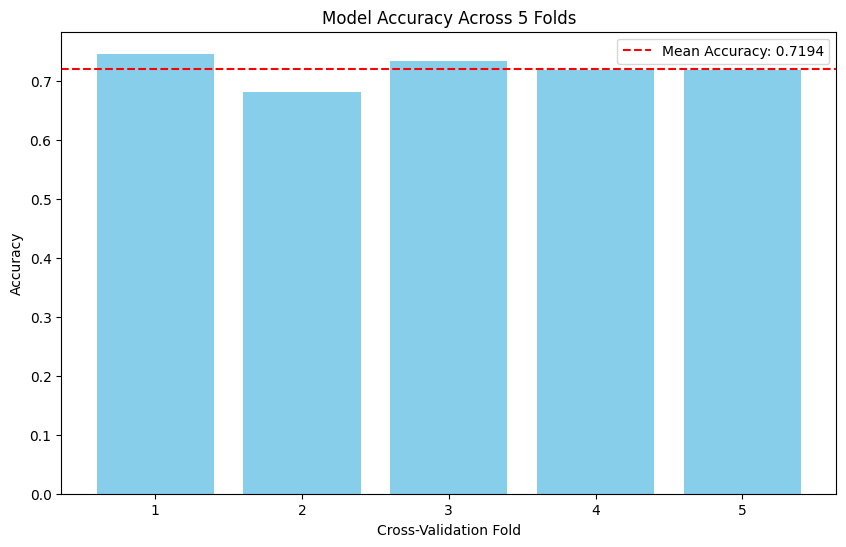


The best model was from fold 1 with accuracy: 0.7460


In [ ]:
# Set up 5 splits with StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [20, 30, 40],
    'min_samples_split': [20, 30, 40],
    'min_samples_leaf': [20, 32, 64],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Lists to store times, accuracy scores, and best models
fit_times = []
accuracy_scores = []
best_models = []

# Loop through the splits
for fold, (train_idx, test_idx) in enumerate(kf.split(X_train_standardized, y_train)):
    print(f"--- Executing fold {fold + 1} ---")

    # Split the dataset
    X_train_fold, X_test_fold = X_train_standardized[train_idx], X_train_standardized[test_idx]
    y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

    # Set up GridSearchCV for Decision Tree
    grid_search = GridSearchCV(model_dt, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

    # Train the model using GridSearchCV and measure time
    start_time = time.time()
    grid_search.fit(X_train_fold, y_train_fold)
    end_time = time.time()

    # Store and print elapsed time
    fit_times.append(end_time - start_time)
    print_elapsed_time(start_time, end_time)

    # Get the best model from the current fold
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Predict on the test fold using the best model
    y_pred = best_model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Best parameters for fold {fold + 1}: {grid_search.best_params_}")
    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")

# Summary of accuracy
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

# Bar Plot for Visual Representation of Accuracy
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), accuracy_scores, color='skyblue')
plt.axhline(mean_accuracy, color='r', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across 5 Folds')
plt.xticks(range(1, 6))
plt.legend()
plt.show()

# Get the best performing model overall
best_fold = np.argmax(accuracy_scores)
best_model = best_models[best_fold]
print(f"\nThe best model was from fold {best_fold + 1} with accuracy: {accuracy_scores[best_fold]:.4f}")

We used different values for the hyper parameters `max_depth`, `min_samples_split`, `min_samples_leaf` and `max_features`. But in order to understand the meaning of the values, we first need to undersand what they do. All of these attributes are hyperparameters useful for prepruning, this is, attributes used to limit the growth of the tree in order to avoid overfitting.

`max_depth` means the maximum depth that the tree can have, it means how large can the tree be. `min_samples_split` refers to the amount of samples necessary to split a node. `min_samples_leaf` this is minimum amount to split a node into a leaf. And finally `max_features` which correspond to the amount of features that are considered when a node needs to be splitted.

Let's check which are the best values for this specific problem.

In [ ]:
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 20, 'splitter': 'best'}


The best parameters are:
* 'max_depth' = 10: This means that the decision tree will only be 10 levels deep.
* 'max_features' = None: There is no limit to the amount of features considered to split a node, this is, all features will be used.
* 'min_samples_leaf' = 64: Every leaf will have at least 64 samples, each.
* 'min_samples_split' = 10: Every node will need at least 10 samples in order to be splitted, otherwise it will stay as a leaf.

Training accuracy: 0.7685
Test accuracy: 0.7213
Confusion Matrix:
[[107  24]
 [ 56 100]]
Classification Report for the best model:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       131
           1       0.81      0.64      0.71       156

    accuracy                           0.72       287
   macro avg       0.73      0.73      0.72       287
weighted avg       0.74      0.72      0.72       287

ROC AUC Score: 0.7941


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


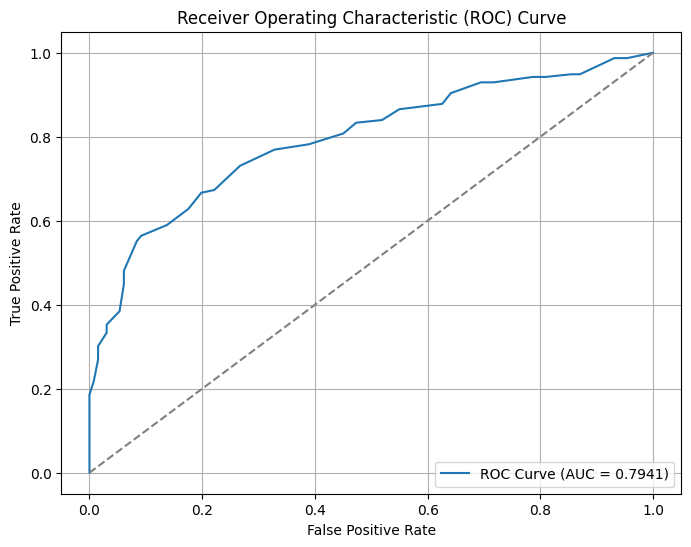

Prediction time: 0.0065 seconds


In [ ]:
dt_accuracy, dt_prediction_time, dt_roc_auc = evaluate_best_model(best_model)

Showing the metrics:

| Metric             | Value   |
|---------------------|---------|
| **Training Accuracy** | 0.7685 |
| **Test Accuracy**     | 0.7213 |
| **Precision**         | 0.74   |
| **Recall**            | 0.72   |
| **F1-Score**          | 0.72   |
| **ROC AUC Score**     | 0.7941 |

|                | Predicted 0 | Predicted 1 |
|----------------|-------------|-------------|
| **Actual 0**   | 107         | 24          |
| **Actual 1**   | 56          | 100         |


Following the trending of the last models, the decision tree doesn't seem to be overfitting to the training data. With this being said, the decision tree model is outperformed by KNN, making this the worst model so far.

## MLP

Now we jump to a very complex model: a Multiple Layer Perceptron model. The Neural Networks use a set of "neurons" positioned in many layers and interconected with one another.

We will use keras from TensorFlow to implement the neural network. First we will import all the necessary libraries.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

Now, lets create a simple architecture, just to understand its parts.

In [ ]:
def create_mlp_model():
  mlp_model = Sequential(
      [
          Input(shape=(X_train.shape[1],)),   # Input layer, has as many perceptrons as there are features
          Dense(32, activation='relu'),        # Hidden layer 1
          Dropout(0.35),
          Dense(32, activation='relu'),        # Hidden layer 2
          Dropout(0.35),
          Dense(32, activation='relu'),        # Hidden layer 3
          Dropout(0.3),
          Dense(32, activation='leaky_relu'),        # Hidden layer 4
          Dropout(0.3),
          Dense(32, activation='leaky_relu'),        # Hidden layer 5
          Dropout(0.3),
          Dense(16, activation='leaky_relu'),         # Hidden layer 6
          Dropout(0.2),
          Dense(1, activation='sigmoid')        # Output layer
      ]
  )
  mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return mlp_model

Here we are using 5 hidden layers of 32 and a hidden layer of 16 perceptrons plus the output layer. The output layer consists of a single perceptron. The hidden layers use the activation function ReLU (and even some others use leaky ReLU), while the output layer uses the Sigmoid activation function. This way we are able to make a binary classification, since the Sigmoid function outputs a probability that can be rounded to 1 or 0.

Showing a summary of the model:

In [ ]:
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,153 (20.13 KB)

 Trainable params: 5,153 (20.13 KB)

 Non-trainable params: 0 (0.00 B)

Before the training of the model, we need to compile it. Here we will choose the loss function, that will determine how far the predictions are from the real data and change the weights of each perceptron through back propagation.

We also need to choose an optimizer, an algorithm that will help us know how to advance towards the best and most optimal configuration. We can also add other metrics like accuracy to analyze the model's behavior through the learning process.

In this case we will use binary cross-entropy as the loss function, because this is a binary classification problem, and this is the function that is mostly uses for these cases. We also use Adam as an since it handles the variations in learning rates throughout the training. The learning rate measures how big the steps are made towards achieving the lowest loss. Finally we will add the accuracy to the compilation, since is our main evaluation metric.

In [ ]:
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

One last step before training the model. We need to divide (once again) our data into the training set and the validation set. Since we will train the model through many epochs, we need to have a validation set that will be used to measure the generalization ability of the model.

In [ ]:
X_train_mlp, X_val, y_train_mlp, y_val = train_test_split(X_train_normalized, y_train, test_size=0.2, random_state=42)

Having done this, we can train the model. To do this we must choose the epoch count and the batch size. The batch size refers to the amount of data we give the model in one forward pass. On the other hand, the epoch refers to the amount of times we give all of these batches to the model (giving it all of the training set per epoch).

Having a big batch size value means that the model will calculate the loss more accurately, changing the model weights accordingly, and thus learning faster. This comes at a higher computational cost.

Having a bigger epoch count means giving the model more chances to improve, but this runs the risk of wasting a lot time training with no significant improvement. After every epoch, the loss function and the accuracy will be calculated for the validation set too.

After testing, we've decided to choose an epoch count of 100 and a batch size of 32.

Now the actual model training will be done:

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import time

# Number of folds
n_folds = 5

# Initialize KFold
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Store validation metrics and best models
validation_scores = []
best_model = None
best_score = -np.inf

# Perform cross-validation
fold = 1
for train_index, val_index in kf.split(X_train_normalized):
    print(f"Fold {fold}")

    # Split the data
    X_train_fold, X_val_fold = X_train_normalized[train_index], X_train_normalized[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Initialize the MLP model (reinitialize for each fold)
    mlp_model = create_mlp_model()  # Replace with your model creation function

    # Train the model
    start_time = time.time()
    history = mlp_model.fit(
        X_train_fold, y_train_fold,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        verbose=1
    )
    end_time = time.time()

    # Print elapsed time
    print_elapsed_time(start_time, end_time)

    # Evaluate the model on the validation set
    val_score = mlp_model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Validation Score for Fold {fold}: {val_score}")
    validation_scores.append(val_score)

    # Evaluate the model on the validation set
    val_score = mlp_model.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Extract the metric
    val_metric = val_score[1]  # Index 1 corresponds to the first metric in the 'metrics' list

    # Save the best model
    if val_metric > best_score:
        best_model = mlp_model
        best_score = val_metric


    fold += 1

# Report the results
print(f"Validation Scores across folds: {validation_scores}")
print(f"Mean Validation Score: {np.mean(validation_scores):.4f}")
print(f"Best Validation Score: {best_score:.4f}")

# Use the best model to make predictions
final_predictions = best_model.predict(X_test_normalized)


Fold 1
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5115 - loss: 0.6902 - val_accuracy: 0.5202 - val_loss: 0.6910
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5013 - loss: 0.6961 - val_accuracy: 0.4798 - val_loss: 0.6915
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5011 - loss: 0.6925 - val_accuracy: 0.5524 - val_loss: 0.6900
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5060 - loss: 0.6929 - val_accuracy: 0.6895 - val_loss: 0.6859
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5294 - loss: 0.6882 - val_accuracy: 0.7339 - val_loss: 0.6730
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6113 - loss: 0.6743 - val_accuracy: 0.7460 - val_loss: 0.6295
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5959 - loss: 0.6569 - val_accuracy: 0.7621 - val_loss: 0.5820
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6466 - loss: 0.6374 - val_accuracy: 0.

Notice that we saved the training results in a variable called `history`. This is because we can use this variable to plot the progress of the model across the different epochs and analyze the behaviors and tendencies that would be otherwise ignored.

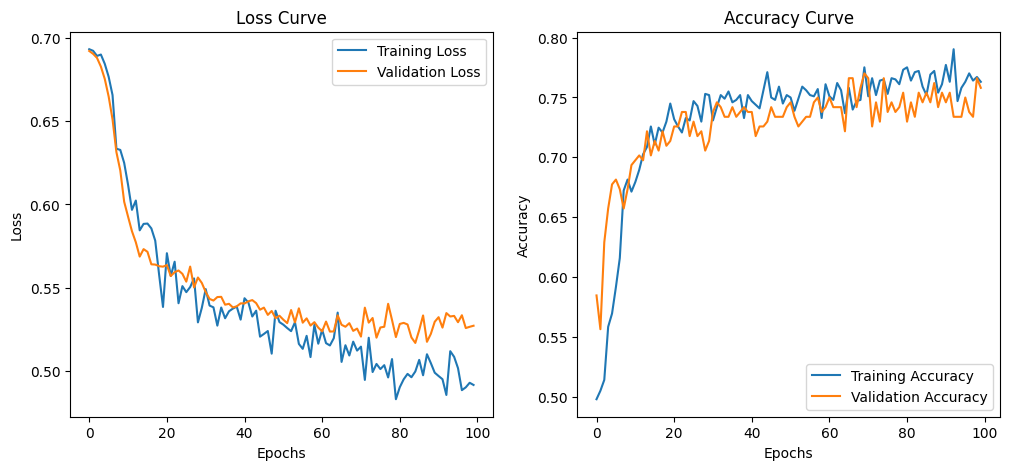

In [ ]:
# Graficar las curvas de pérdida y accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Curva de pérdida
ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Loss Curve')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Curva de accuracy
ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Accuracy Curve')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

With these plots, we can notice that the validation loss tends to sit around 0.55 across the last epochs, while training loss keeps lowering. This may technically lead to overfitting, but this is a fact that we will check through the next code blocks. On the other hand, the accuracy of the training and validation set kept improving across epochs.

Now we will actually evaluate the model against our testing set data:

In [ ]:
y_pred = mlp_model.predict(X_val)
y_pred = (y_pred > 0.5).astype(int)

loss, accuracy = mlp_model.evaluate(X_train_mlp, y_train_mlp)

print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

# Evaluate the model on the test set
loss, accuracy = mlp_model.evaluate(X_val, y_val)

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Print the classification report
print("Classification Report")
print(classification_report(y_val, y_pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.4641 
Train Loss: 0.4766082167625427
Train Accuracy: 0.7802419066429138
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8160 - loss: 0.4102 
Validation Loss: 0.42998310923576355
Validation Accuracy: 0.8024193644523621
Confusion Matrix:
[[107  22]
 [ 27  92]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       129
           1       0.81      0.77      0.79       119

    accuracy                           0.80       248
   macro avg       0.80      0.80      0.80       248
weighted avg       0.80      0.80      0.80       248



It seems that this model has very good overall perfomance, since it has the the highest accuracy and f1-score punctuation so far. But, we must not forget, this is still training phase, in order to know the real model performance we must use the test data.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7666 - loss: 0.4812
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8022 - loss: 0.4890 
Train Loss: 0.4672832489013672
Train Accuracy: 0.7846774458885193
Test Loss: 0.4767032861709595
Test Accuracy: 0.8083623647689819
Confusion Matrix:
[[108  23]
 [ 32 124]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       131
           1       0.84      0.79      0.82       156

    accuracy                           0.81       287
   macro avg       0.81      0.81      0.81       287
weighted avg       0.81      0.81      0.81       287

ROC AUC Score: 0.8546


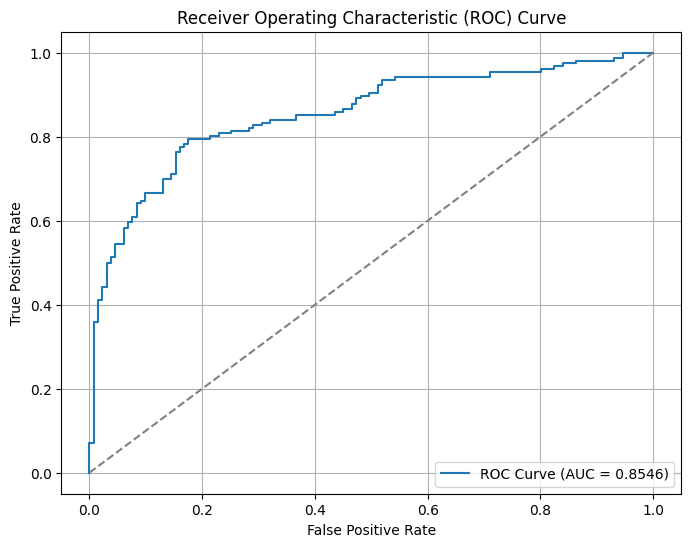

Prediction time: 0.1327 seconds


In [ ]:
# Predict results
start_time = time.time()
y_pred = mlp_model.predict(X_test_normalized)
end_time = time.time()

predictions = (y_pred > 0.5).astype(int)
mlp_prediction_time = end_time - start_time

# Evaluate the model
train_loss, train_accuracy = mlp_model.evaluate(X_train_normalized, y_train)

X_test_normalized = np.array(X_test_normalized)
y_test = np.array(y_test)
test_loss, mlp_accuracy = mlp_model.evaluate(X_test_normalized, y_test)

# Print Test results
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

print("Test Loss:", test_loss)
print("Test Accuracy:", mlp_accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Print the classification report
print("Classification Report")
print(classification_report(y_test, predictions))

# Compute ROC AUC
mlp_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print(f"ROC AUC Score: {mlp_roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {mlp_roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print prediction time
print(f"Prediction time: {mlp_prediction_time:.4f} seconds")

| Metric             | Value   |
|---------------------|---------|
| **Train Loss**        | 0.4673 |
| **Train Accuracy**    | 0.7847 |
| **Test Loss**         | 0.4767 |
| **Test Accuracy**     | 0.8084 |
| **Precision**         | 0.81   |
| **Recall**            | 0.81   |
| **F1-Score**          | 0.81   |
| **ROC AUC**          | 0.8546   |

|                | Predicted 0 | Predicted 1 |
|----------------|-------------|-------------|
| **Actual 0**   | 108         | 23          |
| **Actual 1**   | 32          | 124         |


Interestingly enough, the testing accuracy resulted better than the training accuracy by a small margin. This is the best model yet since it has the best precision, recall, f1 score and ROC AUC score of all of the models trained previously.

# Discussion

## Model Comparison

In order to visually compare the models' perfomance, a line plot will be shown to contrast the time and accuracy differences between models.

First up, the accuracy-comparing graph will be created:

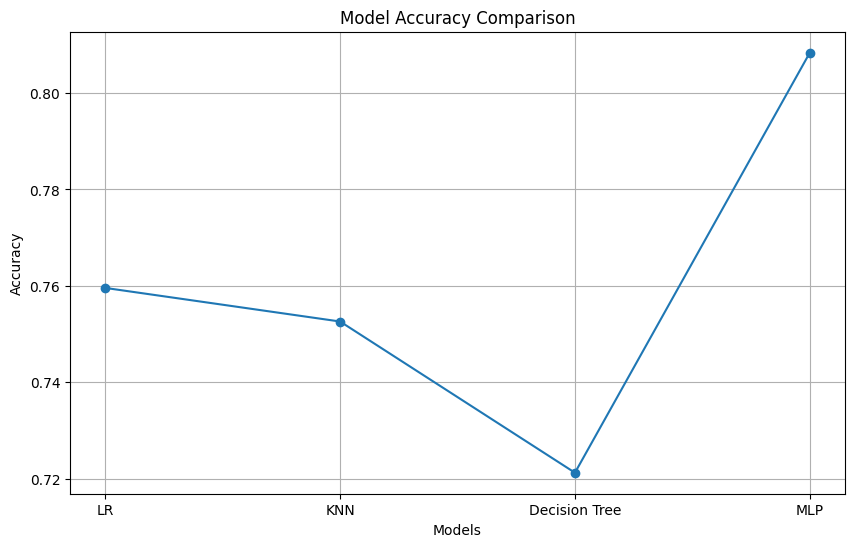

In [ ]:
models = ['LR', 'KNN', 'Decision Tree', 'MLP']
accuracies = [lr_accuracy, knn_accuracy, dt_accuracy, mlp_accuracy]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(True)
plt.show()

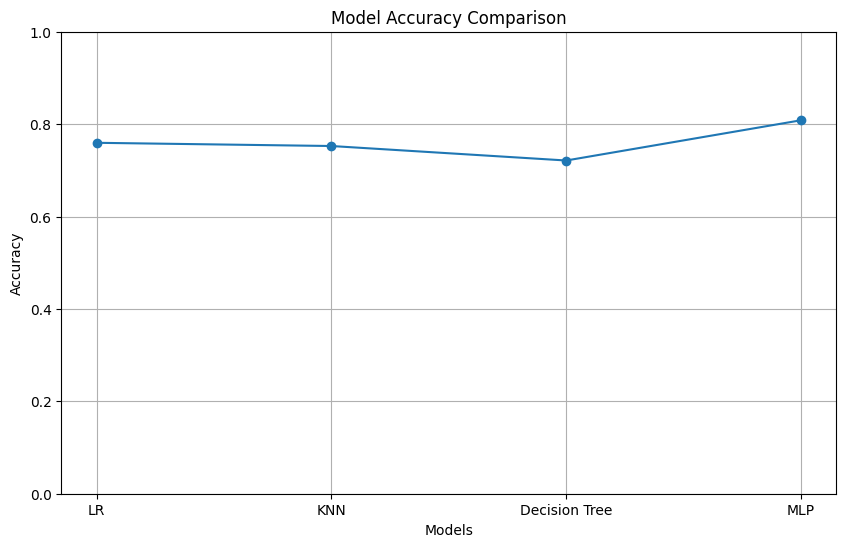

In [ ]:
models = ['LR', 'KNN', 'Decision Tree', 'MLP']
accuracies = [lr_accuracy, knn_accuracy, dt_accuracy, mlp_accuracy]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

As the plot shows, the MLP has the highest accuracy with almost 80% on testing. Although accuracy can tell the overall performance, it is also useful to compare other mesurments, like ROC-AUC.

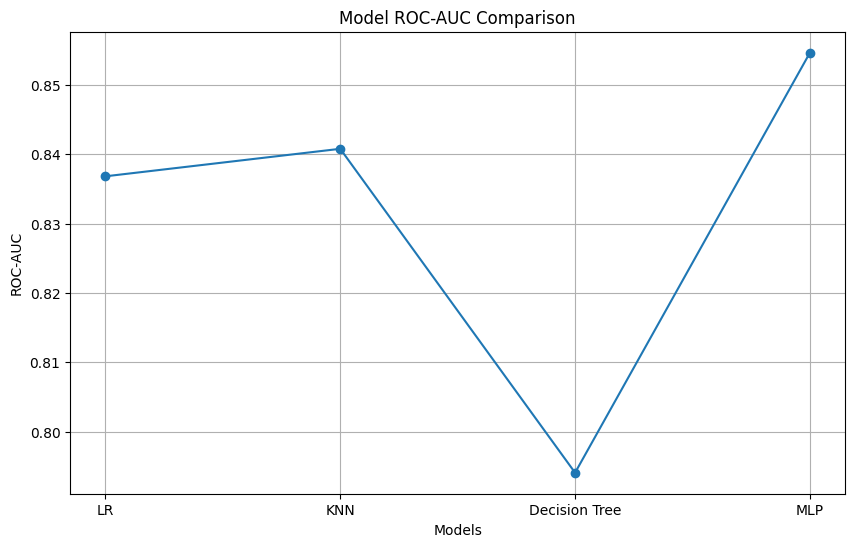

In [ ]:
models = ['LR', 'KNN', 'Decision Tree', 'MLP']
accuracies = [lr_roc_auc, knn_roc_auc, dt_roc_auc, mlp_roc_auc]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o')
plt.xlabel('Models')
plt.ylabel('ROC-AUC')
plt.title('Model ROC-AUC Comparison')
plt.grid(True)
plt.show()

As observed, in this case, the ROC-AUC values differ from the accuracy. This is especially noticeable with KNN, as its accuracy is lower than that of the Linear Regression, while its ROC-AUC score is higher. This indicates that, overall, the Linear Regression is a better classifier than KNN, though KNN produces fewer false positives.

Training the model takes time and in some cases this time cannot be reduced and some specific user might see this as a cost measurement. In practice, the user will not not how much time it took to train a specific model, but it will know how much it will take to use it. For this reason a new plot will be made in order to compare the prediction time of each model.

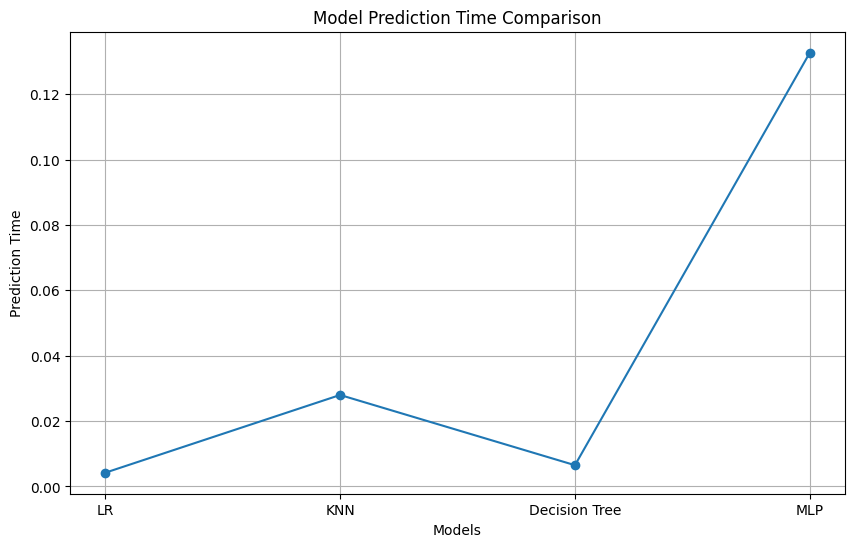

In [ ]:
models = ['LR', 'KNN', 'Decision Tree', 'MLP']
accuracies = [lr_prediction_time, knn_prediction_time, dt_prediction_time, mlp_prediction_time]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o')
plt.xlabel('Models')
plt.ylabel('Prediction Time')
plt.title('Model Prediction Time Comparison')
plt.grid(True)
plt.show()

This plot shows that the model the took the most time to predict is MLP. This doesn't raise a particular concern, since the MLP prediction time value is around 0.12, an extremely low value for normal usage.


## Model performance

Overall, MLP is the model that had the best performance in every metric that was used.

Remarkably, Logistic Regression is the best-performing model of the rest, meaning that it had the highest accuracy value (around 76%) apart from MLP, of course.

It is also imoprtant to note that while KNN is the second worst-performing model of them all, it still had the highest AUC-ROC value apart from MLP.

With this being said, it's still clear that the **best-performing model is the <ins>Multi-Layered Perceptron</ins> model**. This is because it outperforms every other model in every metric:

* Accuracy (0.0488 better than its nearest rival LR)
* Precision (0.04 better than its nearest rival LR)
* Recall (0.05 better than its nearest rival LR)
* F1-Score (0.05 better than its nearest rival LR)

## Future improvements

Although our Decision Tree model didn't seem to overfit, the Random Forest model (model based on creating multiple decision trees) is usually considered an improvement over the simple Decision Tree model. It is important to keep in mind that implementing a Random Forest model implies losing interpretability of the model, since reading 50 or 100 decision trees isn't even an option to consider.

Another topic for improvement could be done in the MLP model. Since there are ways to join the performance of multiple models [at once](https://www.ibm.com/think/topics/meta-learning). This, with the possibility of generating an even better-performing model. The joining of multiple models into a single model is often called making an *ensemble model*, Random Forest is a clear example of an ensemble model.

# Conclusion

In order to classify the wine quality in a binary manner, the Multi-Layered Perceptron model is the preferred over Logistic Regression, KNN and Decision Trees. The Multi-Layered Perceptron model managed to outperform the other three in every metric used in this study.

However, it is imporant to mention that all of the other models still outperformed a 0.7% threshold, which might be acceptable depending of the problem specification.

If using a neural network isn't a viable option for a specific implementation, then as a second recommendation the Logistic Regression model is endorsed.